In [22]:
import pandas as pd

seed = 333

# Load the CSV data
data1 = pd.read_csv(f'optimalSplit_report_10_{seed}.csv')

# Select the required columns from data1
data1_selected = data1[['n', 'sparsity', 'seed', 'solution_lowest', 'value_lowest', 'solution_most', 'value_most', 'annealer_tte']]


# Load the CSV data
data2 = pd.read_csv(f'optimalSplit_report_11_{seed}.csv')
# Select the required columns from data2, adding empty columns for 'solution_lowest' and 'value_lowest'
# data2_selected = data2[['n', 'sparsity', 'seed', 'solution_first', 'value_first', 'solution_most', 'value_most', 'annealer_tte']]

data2_selected = data2[['n', 'sparsity', 'seed']]
data2_selected['solution_lowest'] = data2['solution_first']
data2_selected['value_lowest'] = data2['value_first']
data2_selected['solution_most'] = data2['solution_most']
data2_selected['value_most'] = data2['value_most']
data2_selected['annealer_tte'] = data2['annealer_tte']


# Reorder columns to match the format of data1_selected
# data2_selected = data2_selected[['n', 'sparsity', 'distribution', 'seed', 'solution_first', 'value_first', 'solution_most', 'value_most', 'annealer_tte']]

# Concatenate the data
combined_data = pd.concat([data1_selected, data2_selected], ignore_index=True)

# Save the combined data to a new CSV file
combined_data.to_csv(f'annealer_{seed}.csv', index=False)

print(f"The new file 'annealer_{seed}.csv' has been created successfully.")


The new file 'annealer_333.csv' has been created successfully.


C:\Users\mysore\AppData\Local\Temp\ipykernel_24140\2237663402.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_selected['solution_lowest'] = data2['solution_first']
C:\Users\mysore\AppData\Local\Temp\ipykernel_24140\2237663402.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_selected['value_lowest'] = data2['value_first']
C:\Users\mysore\AppData\Local\Temp\ipykernel_24140\2237663402.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [17]:
import pandas as pd

seed = 333

# Load the CSV data
data1 = pd.read_csv(f'optimalSplit_report_01_{seed}.csv')

# Select the required columns from data1
data1_selected = data1[['n', 'sparsity', 'seed', 'solution_gurobi', 'value_gurobi', 'gurobi_tte']]


# Load the CSV data
data2 = pd.read_csv(f'optimalSplit_report_11_{seed}.csv')
# Select the required columns from data2, adding empty columns for 'solution_lowest' and 'value_lowest'
# data2_selected = data2[['n', 'sparsity', 'seed', 'solution_first', 'value_first', 'solution_most', 'value_most', 'annealer_tte']]

data2_selected = data2[['n', 'sparsity', 'seed', 'solution_gurobi', 'value_gurobi', 'gurobi_tte']]


# Reorder columns to match the format of data1_selected
# data2_selected = data2_selected[['n', 'sparsity', 'distribution', 'seed', 'solution_first', 'value_first', 'solution_most', 'value_most', 'annealer_tte']]

# Concatenate the data
combined_data = pd.concat([data1_selected, data2_selected], ignore_index=True)

# Save the combined data to a new CSV file
combined_data.to_csv(f'gurobi_{seed}.csv', index=False)

print(f"The new file 'gurobi_{seed}.csv' has been created successfully.")


The new file 'gurobi_333.csv' has been created successfully.


In [24]:
import pandas as pd
import numpy as np

# Define the seeds
seeds = [111, 222, 333]

# Initialize a list to hold the data frames
data_frames = []

# Load the data from each file and add it to the list
for seed in seeds:
    file_name = f'annealer_{seed}.csv'
    df = pd.read_csv(file_name)
    data_frames.append(df)

# Concatenate all the data frames
all_data = pd.concat(data_frames, ignore_index=True)

# Group the data by 'n' and 'sparsity' and calculate the required statistics
result = all_data.groupby(['n', 'sparsity']).agg(
    mean=('annealer_tte', 'mean'),
    min=('annealer_tte', 'min'),
    max=('annealer_tte', 'max'),
    std=('annealer_tte', 'std')
).reset_index()

# Calculate lower and upper bounds, handle cases where std is NaN (due to single value entries)
result['lower'] = result.apply(lambda row: row['mean'] if np.isnan(row['std']) else row['mean'] - row['std'], axis=1)
result['upper'] = result.apply(lambda row: row['mean'] if np.isnan(row['std']) else row['mean'] + row['std'], axis=1)

# Drop the std column as it's no longer needed
result = result.drop(columns=['std'])

# Save the result to a new CSV file
result.to_csv('annealer_tte.csv', index=False)

print("The new file 'annealer_tte.csv' has been created successfully.")


The new file 'annealer_tte.csv' has been created successfully.


In [23]:
import pandas as pd
import numpy as np

# Define the seeds
seeds = [111, 222]

# Initialize a list to hold the data frames
data_frames = []

# Load the data from each file and add it to the list
for seed in seeds:
    file_name = f'optimalSplit_qputimes_10_{seed}.csv'
    df = pd.read_csv(file_name)
    data_frames.append(df)

# Concatenate all the data frames
all_data = pd.concat(data_frames, ignore_index=True)

# Group the data by 'n' and 'sparsity' and calculate the required statistics
result = all_data.groupby(['n', 'sparsity']).agg(
    mean=('qpu_access_time', 'mean'),
    min=('qpu_access_time', 'min'),
    max=('qpu_access_time', 'max'),
    std=('qpu_access_time', 'std')
).reset_index()

# Calculate lower and upper bounds, handle cases where std is NaN (due to single value entries)
result['lower'] = result.apply(lambda row: row['mean'] if np.isnan(row['std']) else row['mean'] - row['std'], axis=1)
result['upper'] = result.apply(lambda row: row['mean'] if np.isnan(row['std']) else row['mean'] + row['std'], axis=1)

# Drop the std column as it's no longer needed
result = result.drop(columns=['std'])

# Save the result to a new CSV file
result.to_csv('qpu_access_times.csv', index=False)

print("The new file 'qpu_access_times.csv' has been created successfully.")


The new file 'qpu_access_times.csv' has been created successfully.


In [19]:
import pandas as pd
import numpy as np

# Define the seeds
seeds = [111, 222, 333]

# Initialize a list to hold the data frames
data_frames = []

# Load the data from each file and add it to the list
for seed in seeds:
    file_name = f'gurobi_{seed}.csv'
    df = pd.read_csv(file_name)
    data_frames.append(df)

# Concatenate all the data frames
all_data = pd.concat(data_frames, ignore_index=True)

# Group the data by 'n' and 'sparsity' and calculate the required statistics
result = all_data.groupby(['n', 'sparsity']).agg(
    mean=('gurobi_tte', 'mean'),
    min=('gurobi_tte', 'min'),
    max=('gurobi_tte', 'max'),
    std=('gurobi_tte', 'std')
).reset_index()

# Calculate lower and upper bounds, handle cases where std is NaN (due to single value entries)
result['lower'] = result.apply(lambda row: row['mean'] if np.isnan(row['std']) else row['mean'] - row['std'], axis=1)
result['upper'] = result.apply(lambda row: row['mean'] if np.isnan(row['std']) else row['mean'] + row['std'], axis=1)

# Drop the std column as it's no longer needed
result = result.drop(columns=['std'])

# Save the result to a new CSV file
result.to_csv('gurobi_tte.csv', index=False)

print("The new file 'gurobi_tte.csv' has been created successfully.")


The new file 'gurobi_tte.csv' has been created successfully.


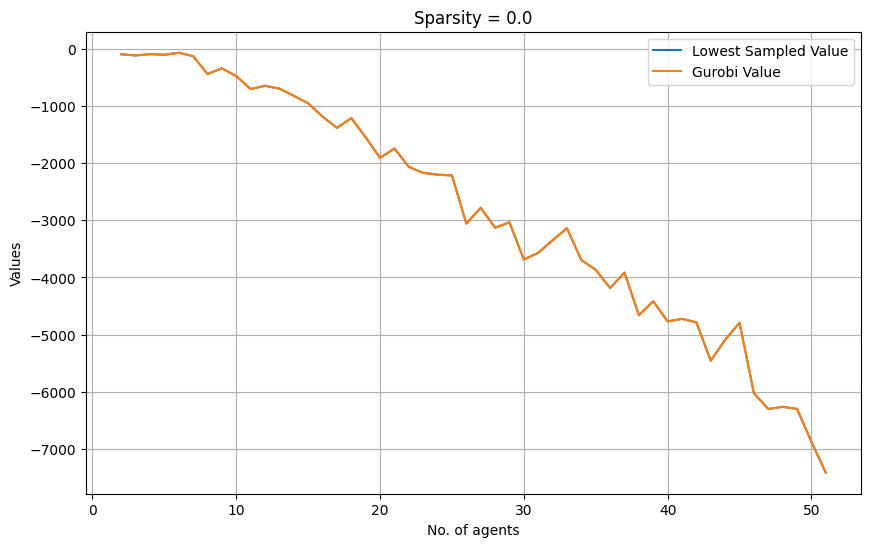

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('optimalSplit_report_11_111.csv')

# Filter the data for sparsity = 0.5
filtered_data = data[data['sparsity'] == 0.0]

# Plotting the values
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['n'], filtered_data['value_first'], label='Lowest Sampled Value')
# plt.plot(filtered_data['n'], filtered_data['value_most'], label='Most Sampled Value')
plt.plot(filtered_data['n'], filtered_data['value_gurobi'], label='Gurobi Value')
plt.xlabel('No. of agents')
plt.ylabel('Values')
plt.title('Sparsity = 0.0')
plt.legend()
plt.grid(True)
plt.show()

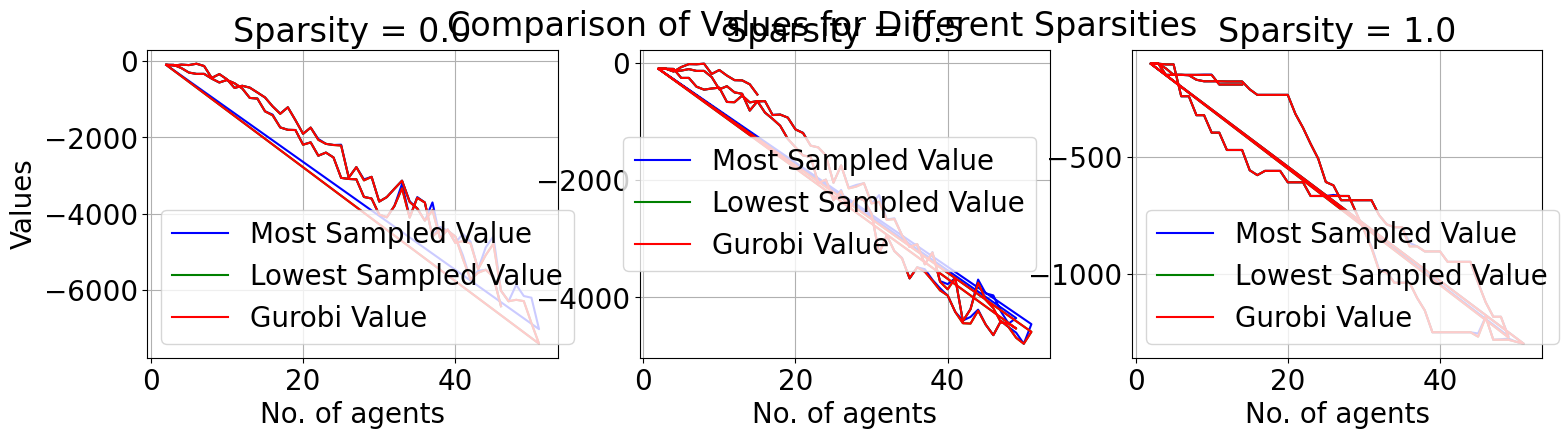

In [47]:
import matplotlib.pyplot as plt

# Define the sparsities to plot
sparsities = [0.0, 0.5, 1.0]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

# Define colors for each line
colors = {
    'Most Sampled Value': 'blue',
    'Lowest Sampled Value': 'green',
    'Gurobi Value': 'red'
}

# Plotting the values for each sparsity
for i, sparsity in enumerate(sparsities):
    filtered_data = data[data['sparsity'] == sparsity]
    axs[i].plot(filtered_data['n'], filtered_data['value_most'], label='Most Sampled Value', color=colors['Most Sampled Value'])
    axs[i].plot(filtered_data['n'], filtered_data['value_first'], label='Lowest Sampled Value', color=colors['Lowest Sampled Value'])
    axs[i].plot(filtered_data['n'], filtered_data['value_gurobi'], label='Gurobi Value', color=colors['Gurobi Value'])
    axs[i].set_title(f'Sparsity = {sparsity}')
    axs[i].set_xlabel('No. of agents')
    axs[i].grid(True)
    if i == 0:
        axs[i].set_ylabel('Values')
    axs[i].legend()

plt.suptitle('Comparison of Values for Different Sparsities')
plt.show()


In [ ]:
number of redundant paths
Cost of managing the link 


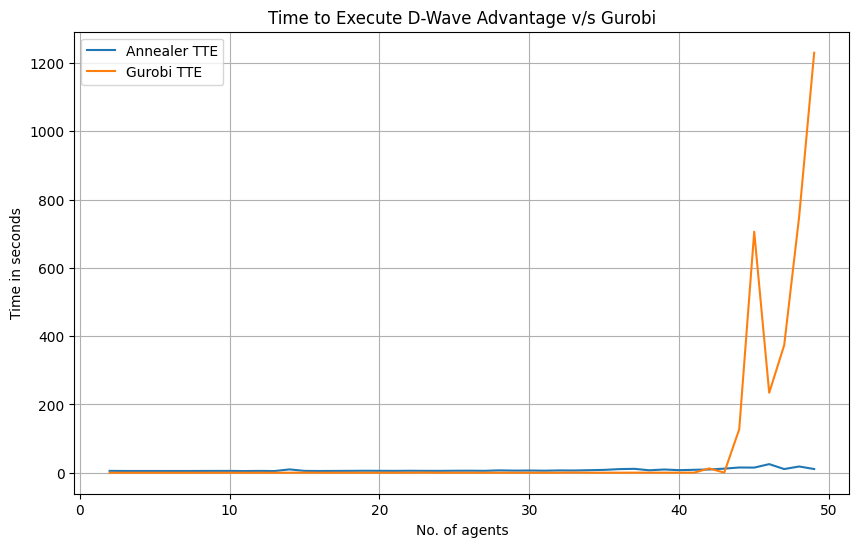

In [16]:

data = pd.read_csv('optimalSplit_report_11_111.csv')

filtered_data = data[data['sparsity'] == 0]

# Plotting the values
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['n'], filtered_data['annealer_tte'], label='Annealer TTE')
plt.plot(filtered_data['n'], filtered_data['gurobi_tte'], label='Gurobi TTE')
plt.xlabel('No. of agents')
plt.ylabel('Time in seconds')
plt.title('Time to Execute D-Wave Advantage v/s Gurobi')
plt.legend()
plt.grid(True)
plt.show()

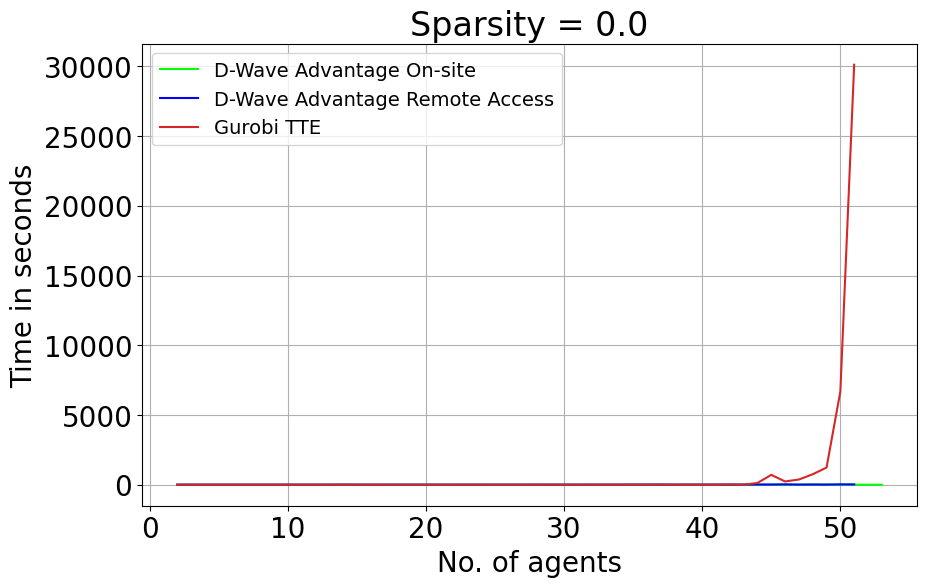

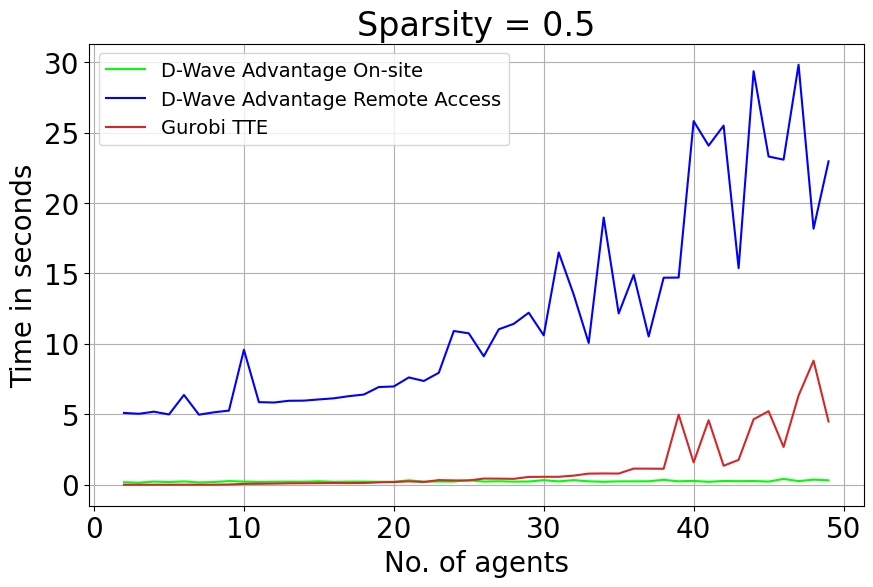

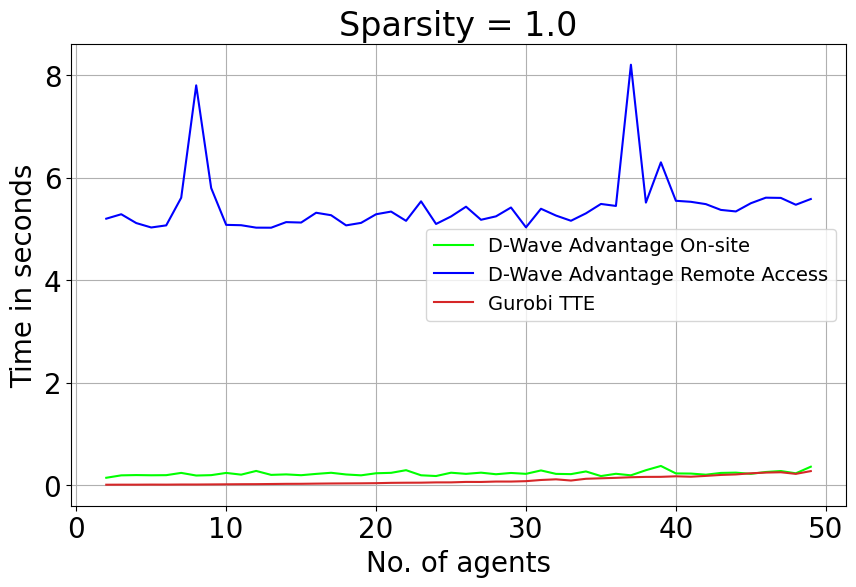

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


sparsities = [0.0,0.5,1.0]

for sparsity in sparsities:

    data = pd.read_csv('optimalSplit_report_11_111.csv')
    filtered_data = data[data['sparsity'] == sparsity]
    filtered_data = filtered_data[filtered_data['seed']==111]
    # Load the CSV data
    data2 = pd.read_csv('optimalSplit_qputimes_11_111.csv')
    filtered_data2 = data2[data2['sparsity'] == sparsity]
    filtered_data2 = filtered_data2[filtered_data2['seed']==111]


    # Set global font size
    plt.rcParams.update({'font.size': 20})  # Set the global font size to 14

    # Plotting the values
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data2['n'], filtered_data2['qpu_access_time'] / 1000000, label='D-Wave Advantage On-site', color='lime')
    plt.plot(filtered_data['n'], filtered_data['annealer_tte'], label='D-Wave Advantage Remote Access', color='blue')
    plt.plot(filtered_data['n'], filtered_data['gurobi_tte'], label='Gurobi TTE', color='tab:red')
    plt.xlabel('No. of agents')
    plt.ylabel('Time in seconds')
    plt.title(f'Sparsity = {sparsity}')
    plt.legend(fontsize=14)  # Increase the font size of the legend
    plt.xticks(fontsize=20)  # Increase the font size of x-axis tick labels
    plt.yticks(fontsize=20)  # Increase the font size of y-axis tick labels
    plt.grid(True)
    plt.show()

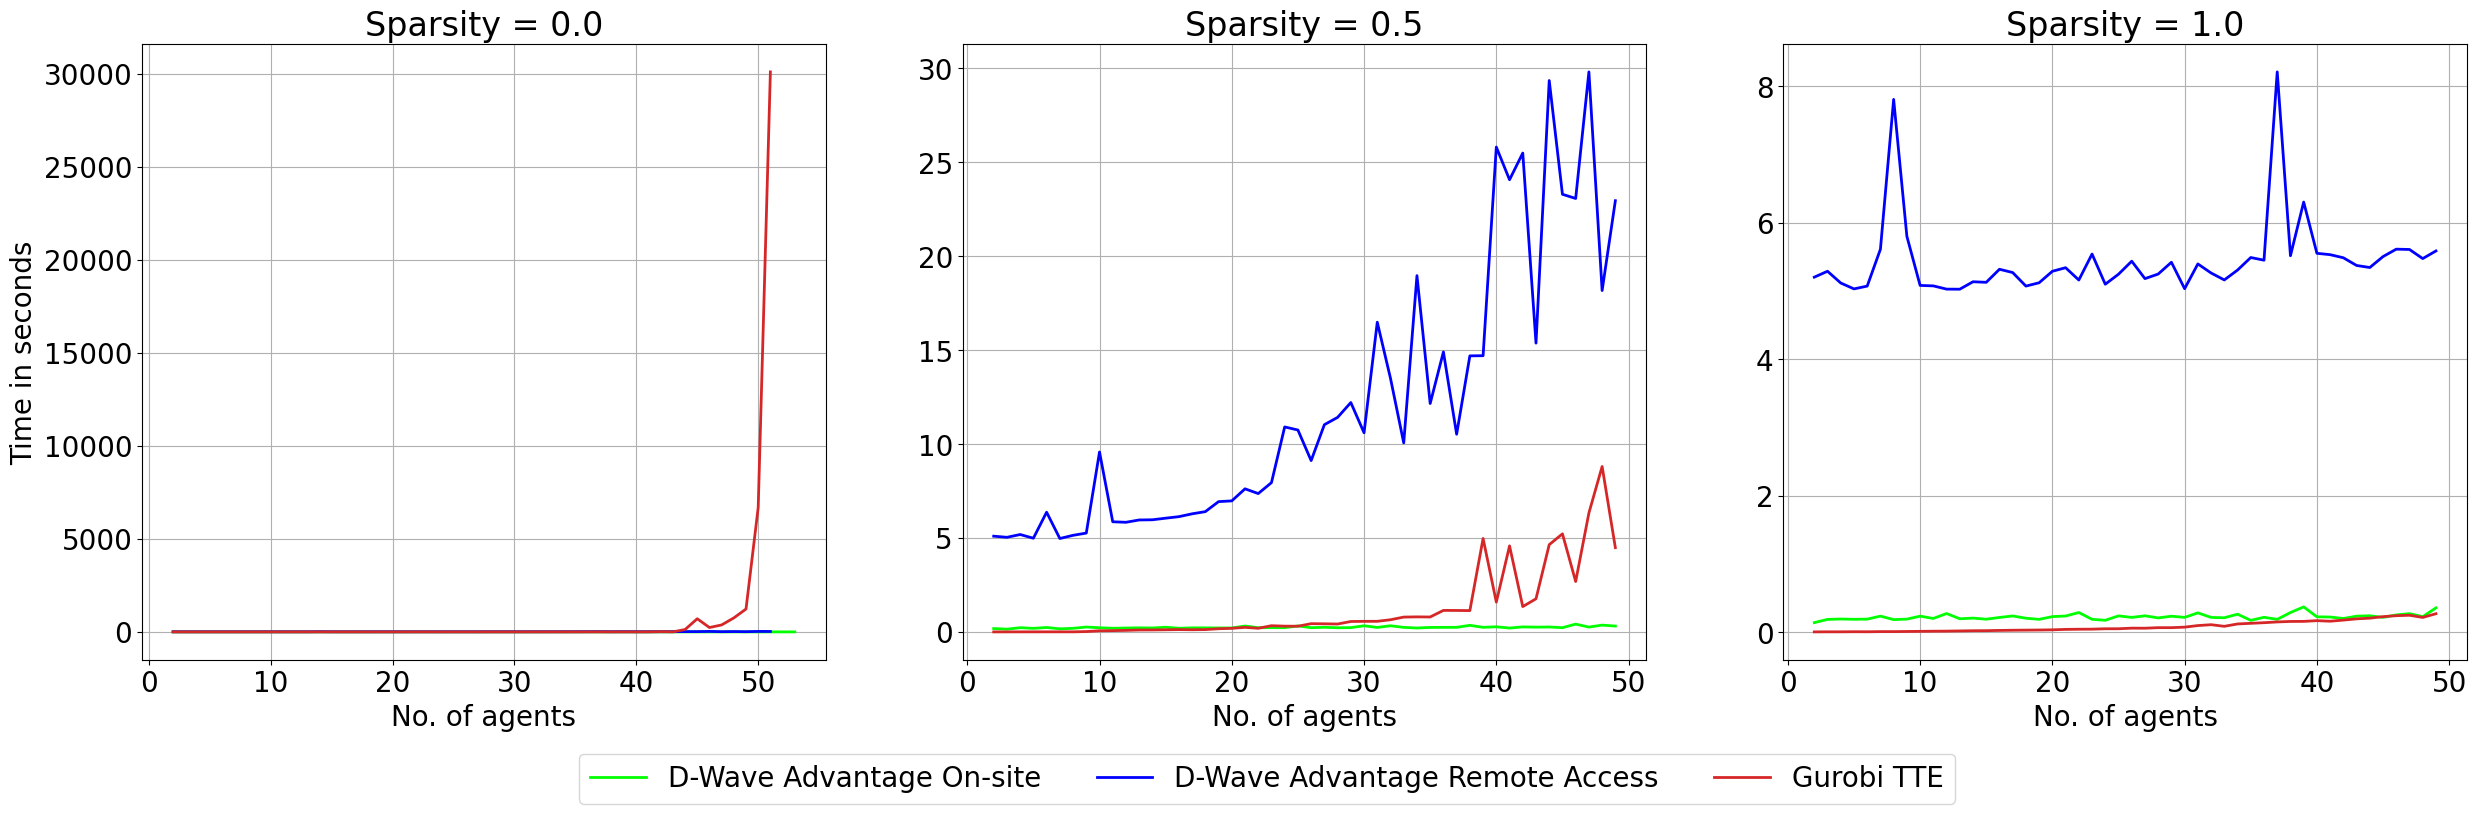

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

sparsities = [0.0, 0.5, 1.0]

# Load the CSV data
data = pd.read_csv('optimalSplit_report_11_111.csv')
data2 = pd.read_csv('optimalSplit_qputimes_11_111.csv')

# Set global font size
plt.rcParams.update({'font.size': 20})

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 8))

for ax, sparsity in zip(axs, sparsities):
    filtered_data = data[(data['sparsity'] == sparsity) & (data['seed'] == 111)]
    filtered_data2 = data2[(data2['sparsity'] == sparsity) & (data2['seed'] == 111)]

    ax.plot(filtered_data2['n'], filtered_data2['qpu_access_time'] / 1000000, label='D-Wave Advantage On-site', color='lime',linewidth=2.0)
    ax.plot(filtered_data['n'], filtered_data['annealer_tte'], label='D-Wave Advantage Remote Access', color='blue', linewidth=2.0)
    ax.plot(filtered_data['n'], filtered_data['gurobi_tte'], label='Gurobi TTE', color='tab:red',linewidth=2.0)
    ax.set_xlabel('No. of agents')
    ax.set_title(f'Sparsity = {sparsity}')
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=20)

# Set the y-axis label for the first subplot
axs[0].set_ylabel('Time in seconds')

# Create a single legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fontsize=20, ncol=3)

plt.show()

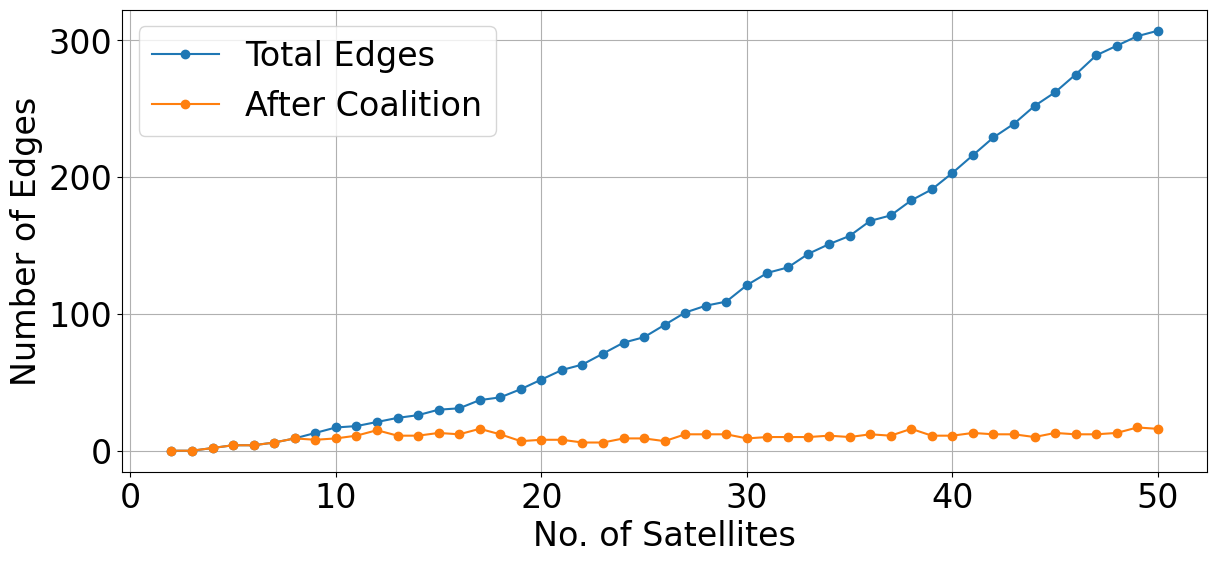

In [42]:
import matplotlib.pyplot as plt

# Data
n_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
total_edges = [0, 0, 2, 4, 4, 6, 9, 13, 17, 18, 21, 24, 26, 30, 31, 37, 39, 45, 52, 59, 63, 71, 79, 83, 92, 101, 106, 109, 121, 130, 134, 144, 151, 157, 168, 172, 183, 191, 203, 216, 229, 239, 252, 262, 275, 289, 296, 303, 307]
after_coalition = [0, 0, 2, 4, 4, 6, 9, 6, 9, 10, 13, 9, 9, 11, 11, 13, 10, 3, 2, 4, 1, 1, 3, 3, 2, 6, 6, 6, 4, 4, 4, 4, 4, 3, 4, 2, 7, 2, 2, 4, 3, 3, 1, 3, 2, 2, 3, 4, 3]
lines_between = [0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 3, 2, 4, 6, 4, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 7, 7, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 13, 13]

# Adding lines_between to after_coalition values
adjusted_after_coalition = [ac + lb for ac, lb in zip(after_coalition, lines_between)]

plt.rcParams.update({'font.size': 24})

# Plotting
plt.figure(figsize=(14, 6))

plt.plot(n_values, total_edges, label='Total Edges', marker='o', linestyle='-')
plt.plot(n_values, adjusted_after_coalition, label='After Coalition', marker='o', linestyle='-')

# Annotate the after coalition points with the part1_part2_count
# for i in range(len(n_values)):
    # plt.text(n_values[i], adjusted_after_coalition[i], str(lines_between[i]), fontsize=10, ha='center')

plt.xlabel('No. of Satellites')
plt.ylabel('Number of Edges')
# plt.title('Total Edges and After Coalition Edges')
plt.legend()
plt.grid(True)

if not os.path.exists("plots"):
    os.makedirs("plots")
save_file_path = os.path.join("plots", f"links.jpg")
plt.savefig(save_file_path, dpi=300, bbox_inches='tight')

plt.show()

optimalSplit_report_11_111.csv
111 50
optimalSplit_report_11_222.csv
222 50
optimalSplit_report_11_333.csv
333 50


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

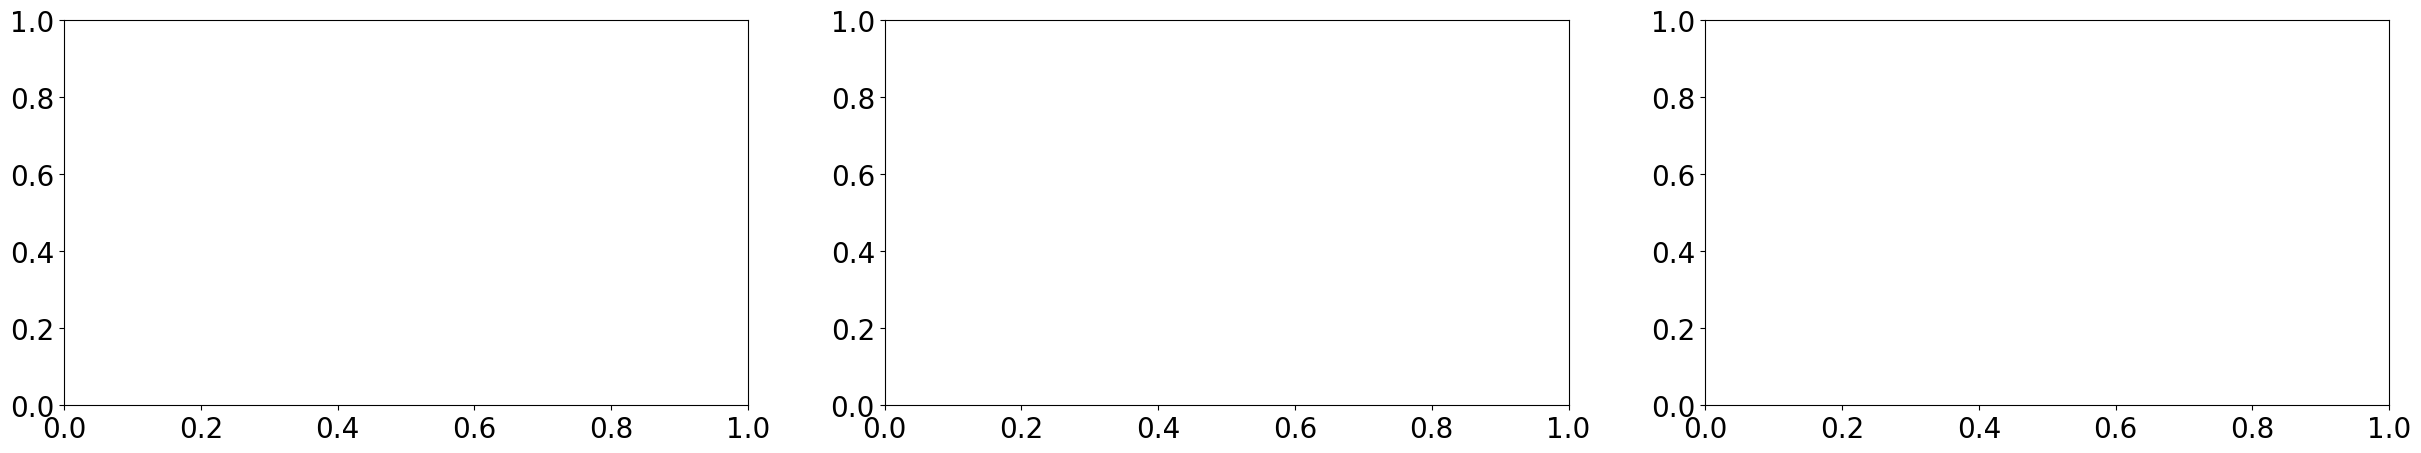

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


sparsities = [0.0, 0.5, 1.0]

seeds = [111,222,333]

# Load the CSV data
# data = pd.read_csv('optimalSplit_report_11_111.csv')
# data2 = pd.read_csv('optimalSplit_qputimes_11_111.csv')

# Set global font size
plt.rcParams.update({'font.size': 20})

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

for ax, sparsity in zip(axs, sparsities):
    qpu_access_times = []
    annealer_ttes = []
    gurobi_ttes = []

    for seed in seeds:
        print(f'optimalSplit_report_11_{seed}.csv')
        data = pd.read_csv(f'optimalSplit_report_11_{seed}.csv')
        data2 = pd.read_csv(f'optimalSplit_qputimes_11_{seed}.csv')
        filtered_data = data[(data['sparsity'] == sparsity)]
        filtered_data2 = data2[(data2['sparsity'] == sparsity)]
        print(seed, len(filtered_data2['qpu_access_time'] / 1000000))
        qpu_access_times.append(filtered_data2['qpu_access_time'] / 1000000)
        annealer_ttes.append(filtered_data['annealer_tte'])
        gurobi_ttes.append(filtered_data['gurobi_tte'])


    qpu_access_times = np.array(qpu_access_times)
    annealer_ttes = np.array(annealer_ttes)
    gurobi_ttes = np.array(gurobi_ttes)
    
    mean_qpu_access_times = np.mean(qpu_access_times, axis=0)
    min_qpu_access_times = np.min(qpu_access_times, axis=0)
    max_qpu_access_times = np.max(qpu_access_times, axis=0)
    std_qpu_access_times = np.std(qpu_access_times, axis=0)
    upper_qpu_access_times = mean_qpu_access_times + std_qpu_access_times
    lower_qpu_access_times = mean_qpu_access_times - std_qpu_access_times
    
    mean_annealer_ttes = np.mean(annealer_ttes, axis=0)
    min_annealer_ttes = np.min(annealer_ttes, axis=0)
    max_annealer_ttes = np.max(annealer_ttes, axis=0)
    std_annealer_ttes = np.std(annealer_ttes, axis=0)
    upper_annealer_ttes = mean_annealer_ttes + std_annealer_ttes
    lower_annealer_ttes = mean_annealer_ttes - std_annealer_ttes
    
    # Calculate statistics
    mean_gurobi_ttes = np.mean(gurobi_ttes, axis=0)
    min_gurobi_ttes = np.min(gurobi_ttes, axis=0)
    max_gurobi_ttes = np.max(gurobi_ttes, axis=0)
    std_gurobi_ttes = np.std(gurobi_ttes, axis=0)
    upper_gurobi_ttes = mean_gurobi_ttes + std_gurobi_ttes
    lower_gurobi_ttes = mean_gurobi_ttes - std_gurobi_ttes


    ax.plot(filtered_data2['n'], list(mean_qpu_access_times)*len(filtered_data2['n']), 'lime', label='On-site', linestyle='dotted')
    ax.fill_between(filtered_data2['n'], list(lower_qpu_access_times)*len(ns), list(upper_qpu_access_times)*len(ns), color='lime', alpha=0.2)
    ax.plot(filtered_data['n'], mean_annealer_ttes, 'blue', label='Remote Access')
    ax.fill_between(filtered_data['n'], lower_annealer_ttes, upper_annealer_ttes, color='blue', alpha=0.2)
    ax.plot(filtered_data['n'], mean_gurobi_ttes, 'tab:red', label='Gurobi')
    ax.fill_between(filtered_data['n'], lower_gurobi_ttes, upper_gurobi_ttes, color='tab:red', alpha=0.2)

    # ax.plot(filtered_data2['n'], filtered_data2['qpu_access_time'] / 1000000, label='On-site', color='lime',linewidth=2.0)
    # ax.plot(filtered_data['n'], filtered_data['annealer_tte'], label='Remote Access', color='blue', linewidth=2.0)
    # ax.plot(filtered_data['n'], filtered_data['gurobi_tte'], label='Gurobi', color='tab:red',linewidth=2.0)
    ax.set_xlabel('No. of satellites')
    ax.set_title(f'Sparsity = {sparsity}')
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=20)

# Set the y-axis label for the first subplot
axs[0].set_ylabel('Time in seconds')

# Create a single legend
# handles, labels = axs[0].get_legend_handles_labels()

lines = [Patch(facecolor='lime'),Patch(facecolor='blue'),Patch(facecolor='tab:red')]
labels = ["On-site",'Remote Access',"Gurobi"]

fig.legend(lines, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.005), bbox_transform=fig.transFigure)

if not os.path.exists("plots"):
    os.makedirs("plots")
save_file_path = os.path.join("plots", f"runtime_v2.jpg")
plt.savefig(save_file_path, dpi=300, bbox_inches='tight')

plt.show()

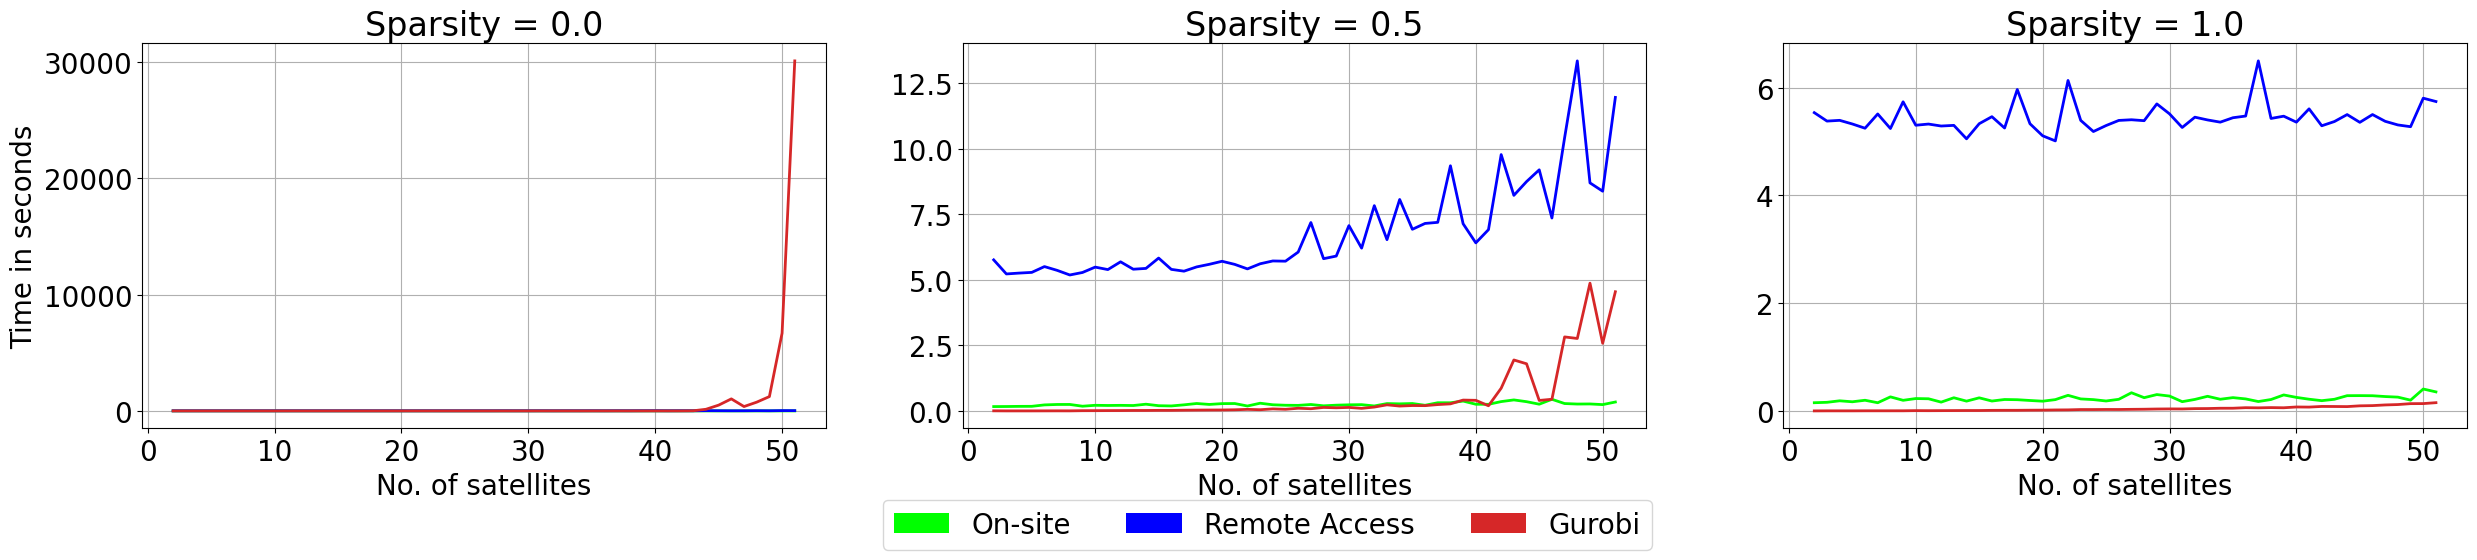

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


sparsities = [0.0, 0.5, 1.0]

# Load the CSV data
data = pd.read_csv('optimalSplit_report_11_222.csv')
data2 = pd.read_csv('optimalSplit_qputimes_11_222.csv')

# Set global font size
plt.rcParams.update({'font.size': 20})

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

for ax, sparsity in zip(axs, sparsities):
    filtered_data = data[(data['sparsity'] == sparsity)]
    filtered_data2 = data2[(data2['sparsity'] == sparsity)]

    ax.plot(filtered_data2['n'], filtered_data2['qpu_access_time'] / 1000000, label='On-site', color='lime',linewidth=2.0)
    ax.plot(filtered_data['n'], filtered_data['annealer_tte'], label='Remote Access', color='blue', linewidth=2.0)
    ax.plot(filtered_data['n'], filtered_data['gurobi_tte'], label='Gurobi', color='tab:red',linewidth=2.0)
    ax.set_xlabel('No. of satellites')
    ax.set_title(f'Sparsity = {sparsity}')
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=20)

# Set the y-axis label for the first subplot
axs[0].set_ylabel('Time in seconds')

# Create a single legend
# handles, labels = axs[0].get_legend_handles_labels()

lines = [Patch(facecolor='lime'),Patch(facecolor='blue'),Patch(facecolor='tab:red')]
labels = ["On-site",'Remote Access',"Gurobi"]

fig.legend(lines, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.005), bbox_transform=fig.transFigure)

if not os.path.exists("plots"):
    os.makedirs("plots")
save_file_path = os.path.join("plots", f"runtime.jpg")
plt.savefig(save_file_path, dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


sparsities = [0.0, 0.5, 1.0]

# Load the CSV data
data = pd.read_csv('optimalSplit_report_11_111.csv')
data2 = pd.read_csv('optimalSplit_qputimes_11_111.csv')

# Set global font size
plt.rcParams.update({'font.size': 20})

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

for ax, sparsity in zip(axs, sparsities):
    filtered_data = data[(data['sparsity'] == sparsity) & (data['seed'] == 111)]
    filtered_data2 = data2[(data2['sparsity'] == sparsity) & (data2['seed'] == 111)]

    ax.plot(filtered_data2['n'], filtered_data2['qpu_access_time'] / 1000000, label='On-site', color='lime',linewidth=2.0)
    ax.plot(filtered_data['n'], filtered_data['annealer_tte'], label='Remote Access', color='blue', linewidth=2.0)
    ax.plot(filtered_data['n'], filtered_data['gurobi_tte'], label='Gurobi', color='tab:red',linewidth=2.0)
    ax.set_xlabel('No. of satellites')
    ax.set_title(f'Sparsity = {sparsity}')
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=20)

# Set the y-axis label for the first subplot
axs[0].set_ylabel('Time in seconds')

# Create a single legend
# handles, labels = axs[0].get_legend_handles_labels()

lines = [Patch(facecolor='lime'),Patch(facecolor='blue'),Patch(facecolor='tab:red')]
labels = ["On-site",'Remote Access',"Gurobi"]

fig.legend(lines, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.005), bbox_transform=fig.transFigure)

if not os.path.exists("plots"):
    os.makedirs("plots")
save_file_path = os.path.join("plots", f"runtime.jpg")
plt.savefig(save_file_path, dpi=300, bbox_inches='tight')

plt.show()

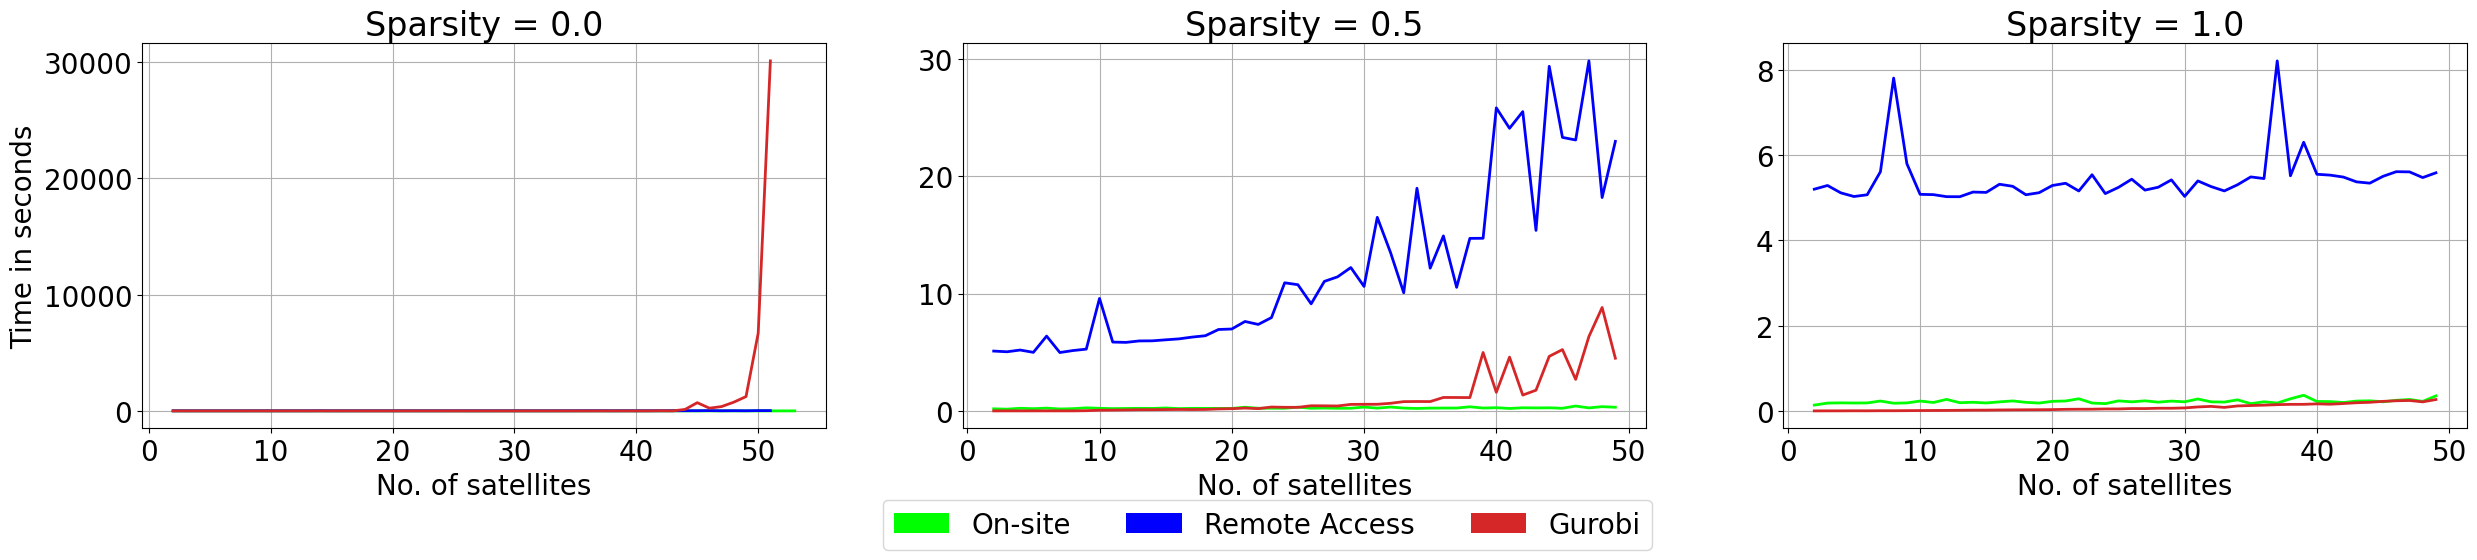

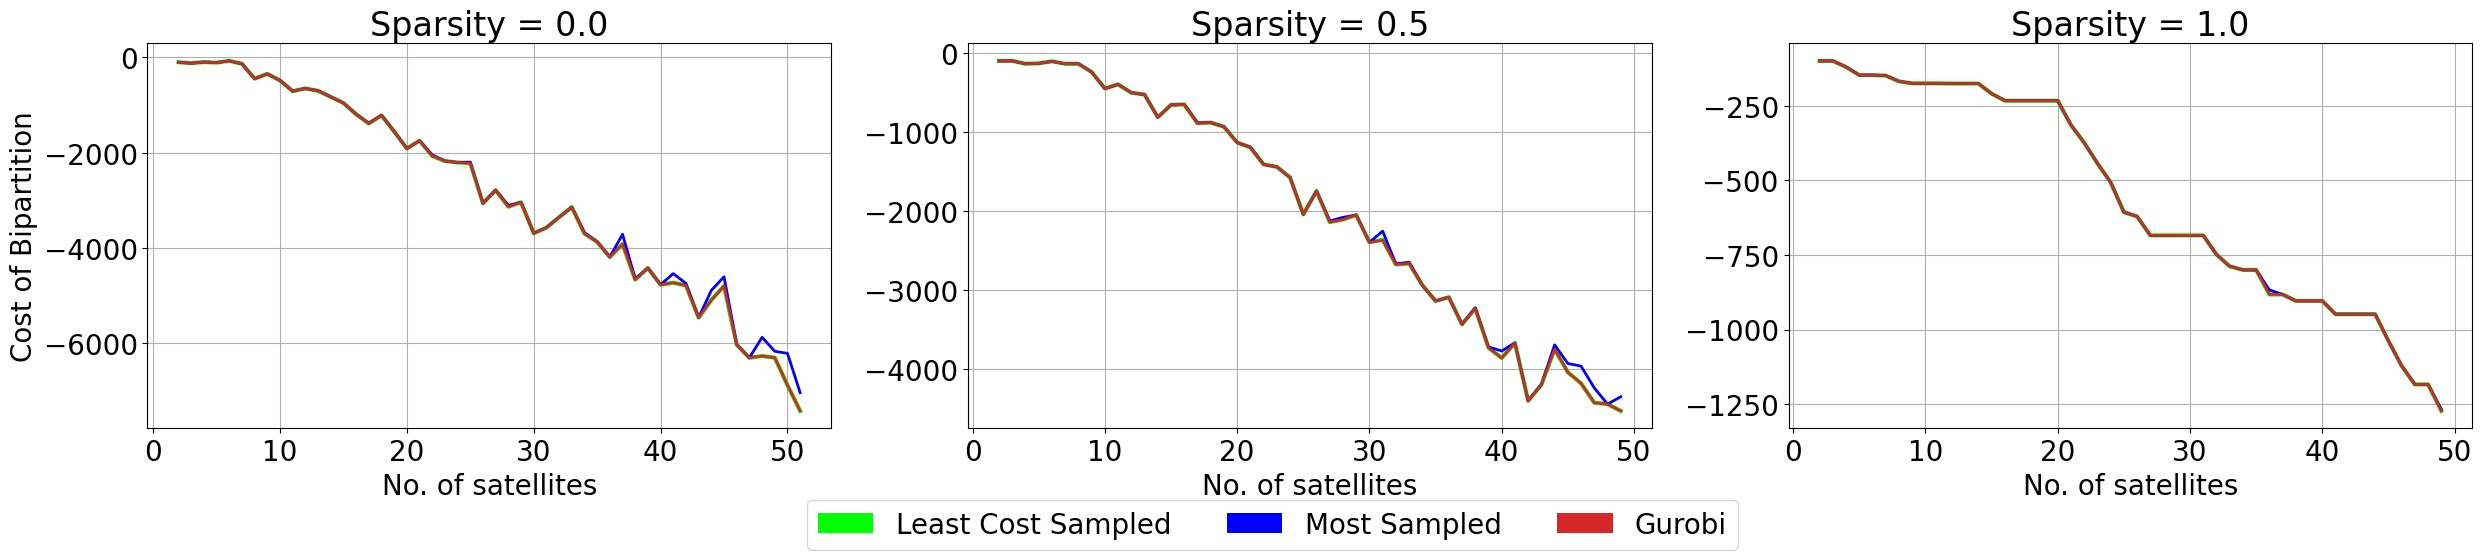

In [33]:
sparsities = [0.0, 0.5, 1.0]

# Load the CSV data
data = pd.read_csv('optimalSplit_report_11_111.csv')

# Set global font size
plt.rcParams.update({'font.size': 20})

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

for ax, sparsity in zip(axs, sparsities):
    filtered_data = data[(data['sparsity'] == sparsity) & (data['seed'] == 111)]

    ax.plot(filtered_data['n'], filtered_data['value_first'], label='Least Cost Sampled', color='lime',linewidth=3.0)
    ax.plot(filtered_data['n'], filtered_data['value_most'], label='Most Sampled', color='blue',linewidth=2.0)
    ax.plot(filtered_data['n'], filtered_data['value_gurobi'], label='Gurobi', color='tab:red', linewidth=2.0)
    ax.set_xlabel('No. of satellites')
    ax.set_title(f'Sparsity = {sparsity}')
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=20)

# Set the y-axis label for the first subplot
axs[0].set_ylabel('Cost of Bipartition')

# Create a single legend
# Create a single legend
# handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fontsize=20, ncol=3)

lines = [Patch(facecolor='lime'),Patch(facecolor='blue'),Patch(facecolor='tab:red')]
labels = ['Least Cost Sampled', "Most Sampled","Gurobi"]

fig.legend(lines, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.005), bbox_transform=fig.transFigure)


if not os.path.exists("plots"):
    os.makedirs("plots")
save_file_path = os.path.join("plots", f"quality.jpg")
plt.savefig(save_file_path, dpi=300, bbox_inches='tight')

plt.show()


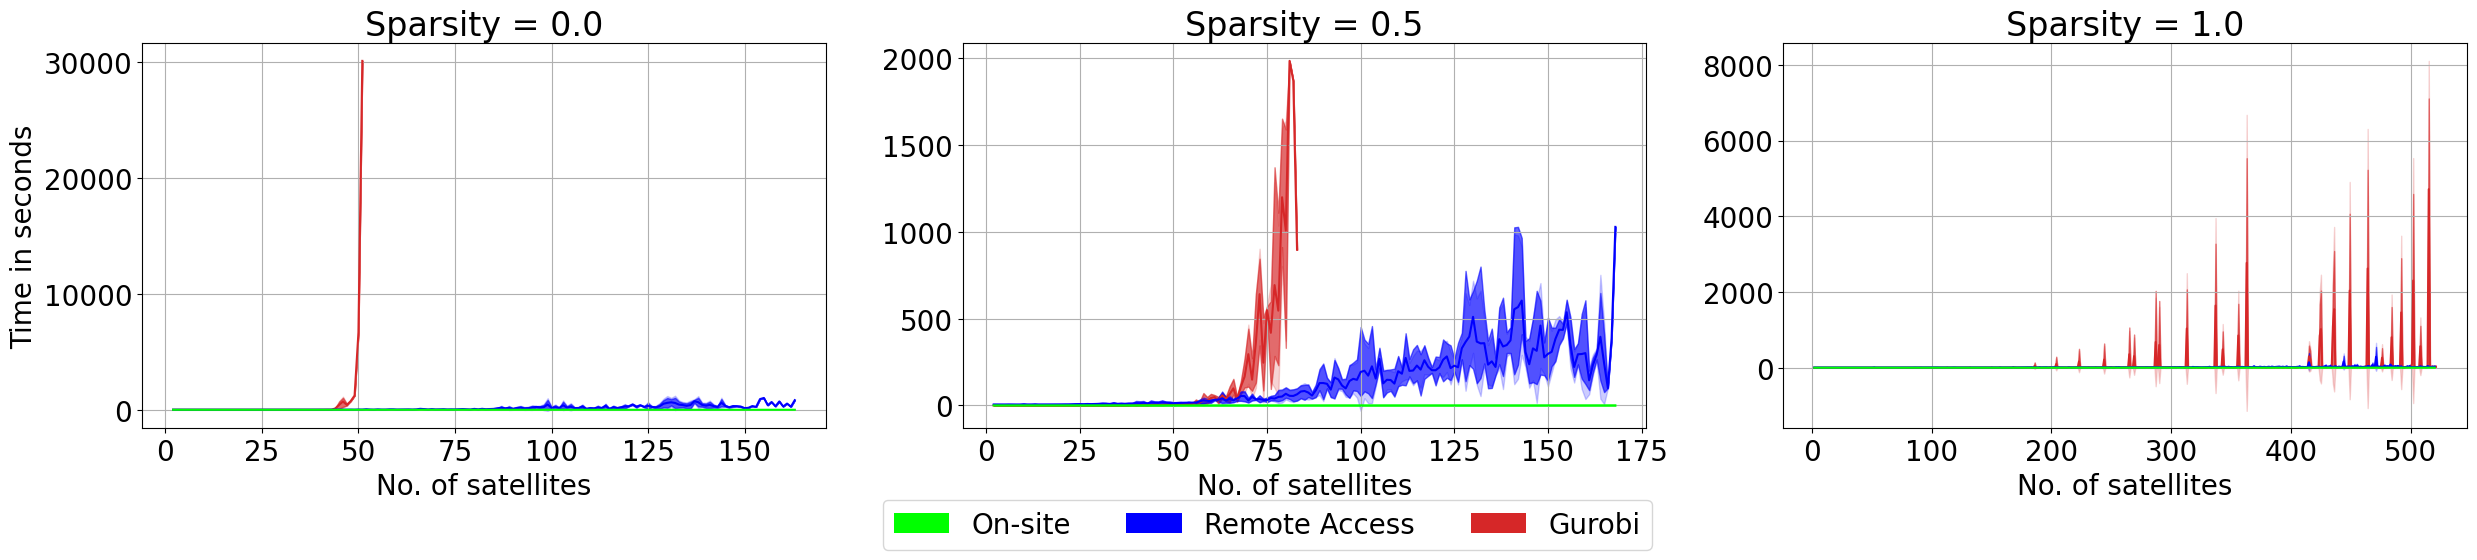

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


sparsities = [0.0, 0.5, 1.0]

# Load the CSV data
gurobi_data = pd.read_csv('gurobi_tte.csv')
annealer_data = pd.read_csv('annealer_tte.csv')
qpu_data = pd.read_csv('qpu_access_times.csv')

# Set global font size
plt.rcParams.update({'font.size': 20})

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

for ax, sparsity in zip(axs, sparsities):
    # filtered_data = data[(data['sparsity'] == sparsity)]
    # filtered_data2 = data2[(data2['sparsity'] == sparsity)]
    gurobi_filtered_data = gurobi_data[gurobi_data['sparsity']==sparsity]
    annealer_filtered_data = annealer_data[annealer_data['sparsity']==sparsity]
    qpu_filtered_data = qpu_data[qpu_data['sparsity']==sparsity]

    ax.plot(gurobi_filtered_data['n'], gurobi_filtered_data['mean'], 'tab:red', label='Gurobi')
    ax.fill_between(gurobi_filtered_data['n'], gurobi_filtered_data['min'], gurobi_filtered_data['max'], color='tab:red', alpha=0.6)
    ax.fill_between(gurobi_filtered_data['n'], gurobi_filtered_data['lower'], gurobi_filtered_data['upper'], color='tab:red', alpha=0.2)
    ax.plot(annealer_filtered_data['n'], annealer_filtered_data['mean'], 'blue', label='Remote Access')
    ax.fill_between(annealer_filtered_data['n'], annealer_filtered_data['min'], annealer_filtered_data['max'], color='blue', alpha=0.6)
    ax.fill_between(annealer_filtered_data['n'], annealer_filtered_data['lower'], annealer_filtered_data['upper'], color='blue', alpha=0.2)
    ax.plot(qpu_filtered_data['n'], qpu_filtered_data['mean'] / 1000000, 'lime', label='On-site')
    ax.fill_between(qpu_filtered_data['n'], qpu_filtered_data['min'] / 1000000, qpu_filtered_data['max'] / 1000000, color='lime', alpha=0.6)
    ax.fill_between(qpu_filtered_data['n'], qpu_filtered_data['lower'] / 1000000, qpu_filtered_data['upper'] / 1000000, color='lime', alpha=0.2)

    # ax.plot(filtered_data2['n'], filtered_data2['qpu_access_time'] / 1000000, label='On-site', color='lime',linewidth=2.0)
    # ax.plot(filtered_data['n'], filtered_data['annealer_tte'], label='Remote Access', color='blue', linewidth=2.0)
    # ax.plot(filtered_data['n'], filtered_data['gurobi_tte'], label='Gurobi', color='tab:red',linewidth=2.0)
    ax.set_xlabel('No. of satellites')
    ax.set_title(f'Sparsity = {sparsity}')
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=20)

# Set the y-axis label for the first subplot
axs[0].set_ylabel('Time in seconds')

# Create a single legend
# handles, labels = axs[0].get_legend_handles_labels()

lines = [Patch(facecolor='lime'),Patch(facecolor='blue'),Patch(facecolor='tab:red')]
labels = ["On-site",'Remote Access',"Gurobi"]

fig.legend(lines, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.005), bbox_transform=fig.transFigure)

if not os.path.exists("plots"):
    os.makedirs("plots")
save_file_path = os.path.join("plots", f"runtime2.jpg")
plt.savefig(save_file_path, dpi=300, bbox_inches='tight')

plt.show()

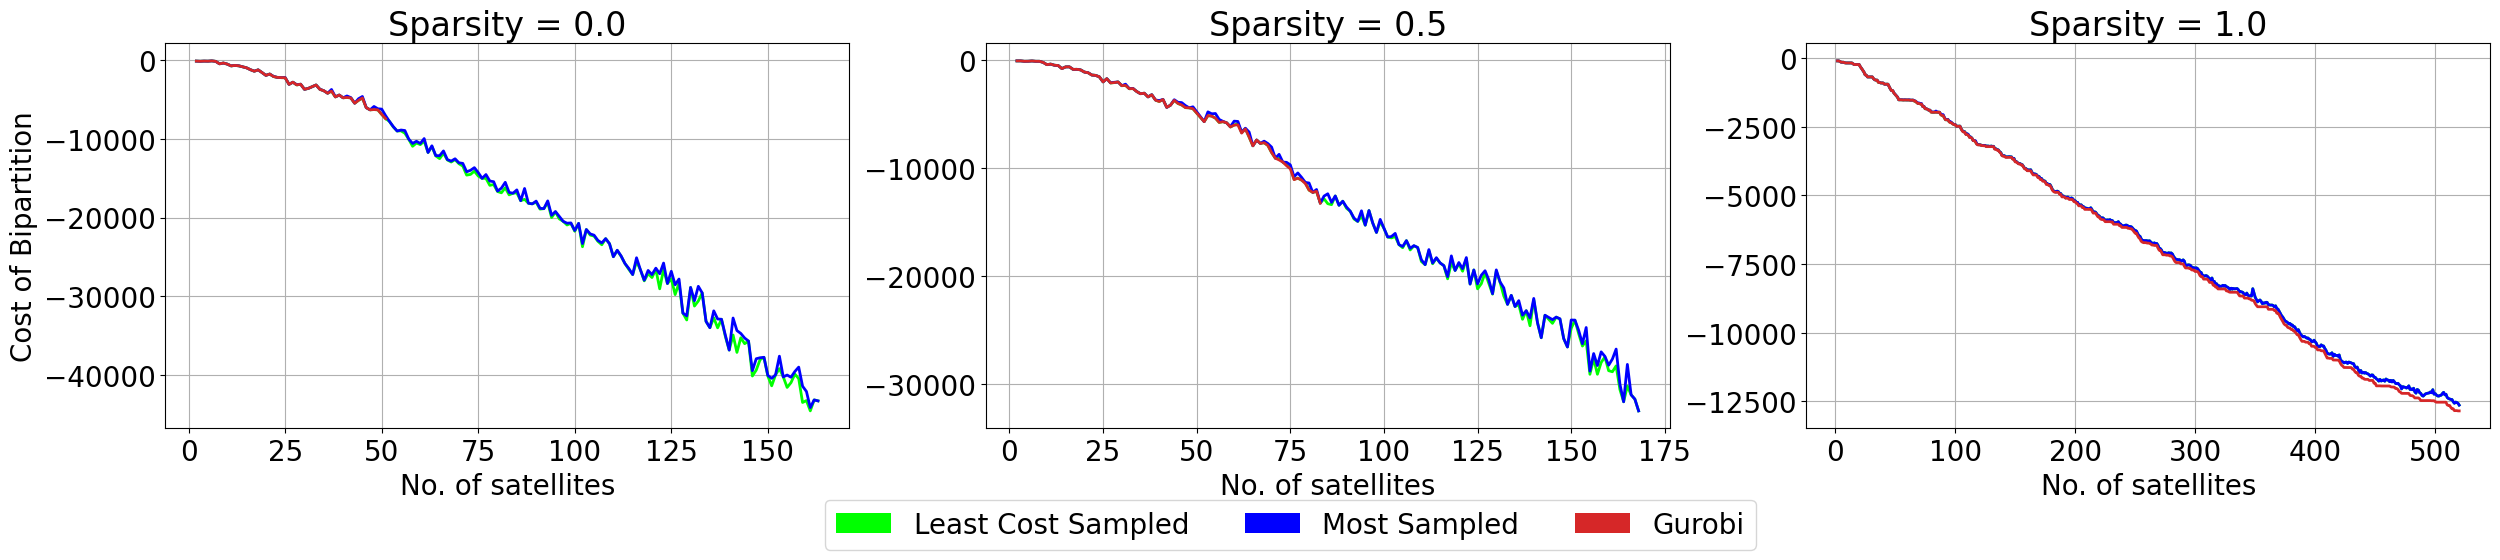

In [41]:
sparsities = [0.0, 0.5, 1.0]

# Load the CSV data
annealer_data = pd.read_csv('annealer_111.csv')
gurobi_data = pd.read_csv('gurobi_111.csv')


# Set global font size
plt.rcParams.update({'font.size': 20})

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

for ax, sparsity in zip(axs, sparsities):
    annealer_filtered_data = annealer_data[(annealer_data['sparsity'] == sparsity)]
    annealer_filtered_data = annealer_filtered_data.sort_values(by='n')
    gurobi_filtered_data = gurobi_data[(gurobi_data['sparsity'] == sparsity)]
    gurobi_filtered_data = gurobi_filtered_data.sort_values(by='n')

    value_lowest = []
    value_most = []

    for i in range(len(annealer_filtered_data['value_lowest'])):
        value_lowest.append(min(list(annealer_filtered_data['value_lowest'])[i],list(annealer_filtered_data['value_most'])[i]))
        value_most.append(max(list(annealer_filtered_data['value_lowest'])[i],list(annealer_filtered_data['value_most'])[i]))

    ax.plot(annealer_filtered_data['n'], value_lowest, label='Least Cost Sampled', color='lime',linewidth=2.0)
    ax.plot(annealer_filtered_data['n'], value_most, label='Most Sampled', color='blue',linewidth=2.0)
    ax.plot(gurobi_filtered_data['n'], gurobi_filtered_data['value_gurobi'], label='Gurobi', color='tab:red', linewidth=2.0)
    ax.set_xlabel('No. of satellites')
    ax.set_title(f'Sparsity = {sparsity}')
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=20)

# Set the y-axis label for the first subplot
axs[0].set_ylabel('Cost of Bipartition')

# Create a single legend
# Create a single legend
# handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fontsize=20, ncol=3)

lines = [Patch(facecolor='lime'),Patch(facecolor='blue'),Patch(facecolor='tab:red')]
labels = ['Least Cost Sampled', "Most Sampled","Gurobi"]

fig.legend(lines, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.005), bbox_transform=fig.transFigure)


if not os.path.exists("plots"):
    os.makedirs("plots")
save_file_path = os.path.join("plots", f"quality2.jpg")
plt.savefig(save_file_path, dpi=300, bbox_inches='tight')

plt.show()


In [40]:
list(annealer_filtered_data['value_lowest'])

[-100.0,
 -120.51,
 -96.47,
 -107.95,
 -72.23,
 -132.41,
 -445.29,
 -344.68,
 -481.26,
 -707.27,
 -650.32,
 -700.06,
 -826.76,
 -956.39,
 -1190.48,
 -1385.92,
 -1214.8,
 -1553.18,
 -1910.46,
 -1746.87,
 -2068.12,
 -2173.27,
 -2203.36,
 -2217.84,
 -3059.2,
 -2783.85,
 -3131.16,
 -3038.49,
 -3687.26,
 -3569.99,
 -3351.32,
 -3140.04,
 -3697.08,
 -3868.06,
 -4187.27,
 -3916.12,
 -4660.46,
 -4417.59,
 -4769.73,
 -4724.69,
 -4786.52,
 -5457.56,
 -5090.2,
 -4793.45,
 -6024.47,
 -6301.14,
 -6262.88,
 -6298.56,
 -6873.87,
 -7414.76,
 -7765.62,
 -8434.7,
 -8995.45,
 -8868.58,
 -8930.88,
 -10021.7,
 -10576.1,
 -10299.31,
 -10578.21,
 -10283.17,
 -11727.18,
 -10875.1,
 -12119.96,
 -12134.83,
 -11529.51,
 -12626.97,
 -12938.55,
 -12527.14,
 -13037.22,
 -13112.78,
 -14180.78,
 -13994.13,
 -13654.89,
 -14282.5,
 -15020.63,
 -14531.66,
 -15357.49,
 -15444.78,
 -16633.55,
 -16263.7,
 -15519.37,
 -17118.48,
 -16910.96,
 -16486.56,
 -17860.82,
 -16306.35,
 -18184.08,
 -18262.62,
 -18051.14,
 -18930.06,
 

In [ ]:
sparsities = [0.0, 0.5, 1.0]

# Load the CSV data
annealer_data = pd.read_csv('annealer_111.csv')
gurobi_data = pd.read_csv('gurobi_111.csv')


# Set global font size
plt.rcParams.update({'font.size': 20})

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

for ax, sparsity in zip(axs, sparsities):
    annealer_filtered_data = annealer_data[(annealer_data['sparsity'] == sparsity)]
    annealer_filtered_data = annealer_filtered_data.sort_values(by='n')
    gurobi_filtered_data = gurobi_data[(gurobi_data['sparsity'] == sparsity)]
    gurobi_filtered_data = gurobi_filtered_data.sort_values(by='n')

    fig_ , ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True, gridspec_kw={'height_ratios': [1, 0.5]})

    ax[0].plot(annealer_filtered_data['n'], annealer_filtered_data['value_lowest'], label='Least Cost Sampled', color='lime',linewidth=3.0)
    ax[0].plot(annealer_filtered_data['n'], annealer_filtered_data['value_most'], label='Most Sampled', color='blue',linewidth=2.0)
    ax[0].plot(gurobi_filtered_data['n'], gurobi_filtered_data['value_gurobi'], label='Gurobi', color='tab:red', linewidth=2.0)
    ax[0].set_xlabel('No. of satellites')
    ax[0].set_title(f'Sparsity = {sparsity}')
    ax[0].grid(True)
    ax[0].tick_params(axis='both', which='major', labelsize=20)

# Set the y-axis label for the first subplot
axs[0].set_ylabel('Cost of Bipartition')

# Create a single legend
# Create a single legend
# handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fontsize=20, ncol=3)

lines = [Patch(facecolor='lime'),Patch(facecolor='blue'),Patch(facecolor='tab:red')]
labels = ['Least Cost Sampled', "Most Sampled","Gurobi"]

fig.legend(lines, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.005), bbox_transform=fig.transFigure)


if not os.path.exists("plots"):
    os.makedirs("plots")
save_file_path = os.path.join("plots", f"quality2.jpg")
plt.savefig(save_file_path, dpi=300, bbox_inches='tight')

plt.show()


In [34]:
!python --version

Python 3.12.2


In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt

# sparsities = [0.0, 0.5, 1.0]

# # Load the CSV data
# data = pd.read_csv('optimalSplit_report_11_111.csv')
# data2 = pd.read_csv('optimalSplit_qputimes_11_111.csv')

# # Set global font size
# plt.rcParams.update({'font.size': 20})

# # Create subplots with 2 rows and 3 columns
# fig, axs = plt.subplots(2, 3, figsize=(30, 16))

# # Plotting the runtime values
# for ax, sparsity in zip(axs[0], sparsities):
#     filtered_data = data[(data['sparsity'] == sparsity) & (data['seed'] == 111)]
#     filtered_data2 = data2[(data2['sparsity'] == sparsity) & (data2['seed'] == 111)]

#     ax.plot(filtered_data2['n'], filtered_data2['qpu_access_time'] / 1000000, label='D-Wave Advantage On-site', color='lime', linewidth=2.0)
#     ax.plot(filtered_data['n'], filtered_data['annealer_tte'], label='D-Wave Advantage Remote Access', color='blue', linewidth=2.0)
#     ax.plot(filtered_data['n'], filtered_data['gurobi_tte'], label='Gurobi TTE', color='tab:red', linewidth=2.0)
#     ax.set_xlabel('No. of agents')
#     ax.set_title(f'Sparsity = {sparsity}')
#     ax.grid(True)
#     ax.tick_params(axis='both', which='major', labelsize=20)

# # Set the y-axis label for the first subplot
# axs[0, 0].set_ylabel('Time in seconds')

# # Plotting the quality values
# for ax, sparsity in zip(axs[1], sparsities):
#     filtered_data = data[(data['sparsity'] == sparsity) & (data['seed'] == 111)]

#     ax.plot(filtered_data['n'], filtered_data['value_gurobi'], label='Gurobi TTE', color='tab:red', linewidth=3.0)
#     ax.plot(filtered_data['n'], filtered_data['value_most'], label='D-Wave Advantage Remote Access', color='blue', linewidth=1.0)
#     ax.plot(filtered_data['n'], filtered_data['value_first'], label='D-Wave Advantage On-site', color='lime', linewidth=1.0)
#     ax.set_xlabel('No. of agents')
#     ax.set_title(f'Sparsity = {sparsity}')
#     ax.grid(True)
#     ax.tick_params(axis='both', which='major', labelsize=20)

# # Set the y-axis label for the first subplot
# axs[1, 0].set_ylabel('Cost of Bipartition')

# # Create a single legend
# handles, labels = axs[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), fontsize=20, ncol=3)

# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the legend
# plt.show()


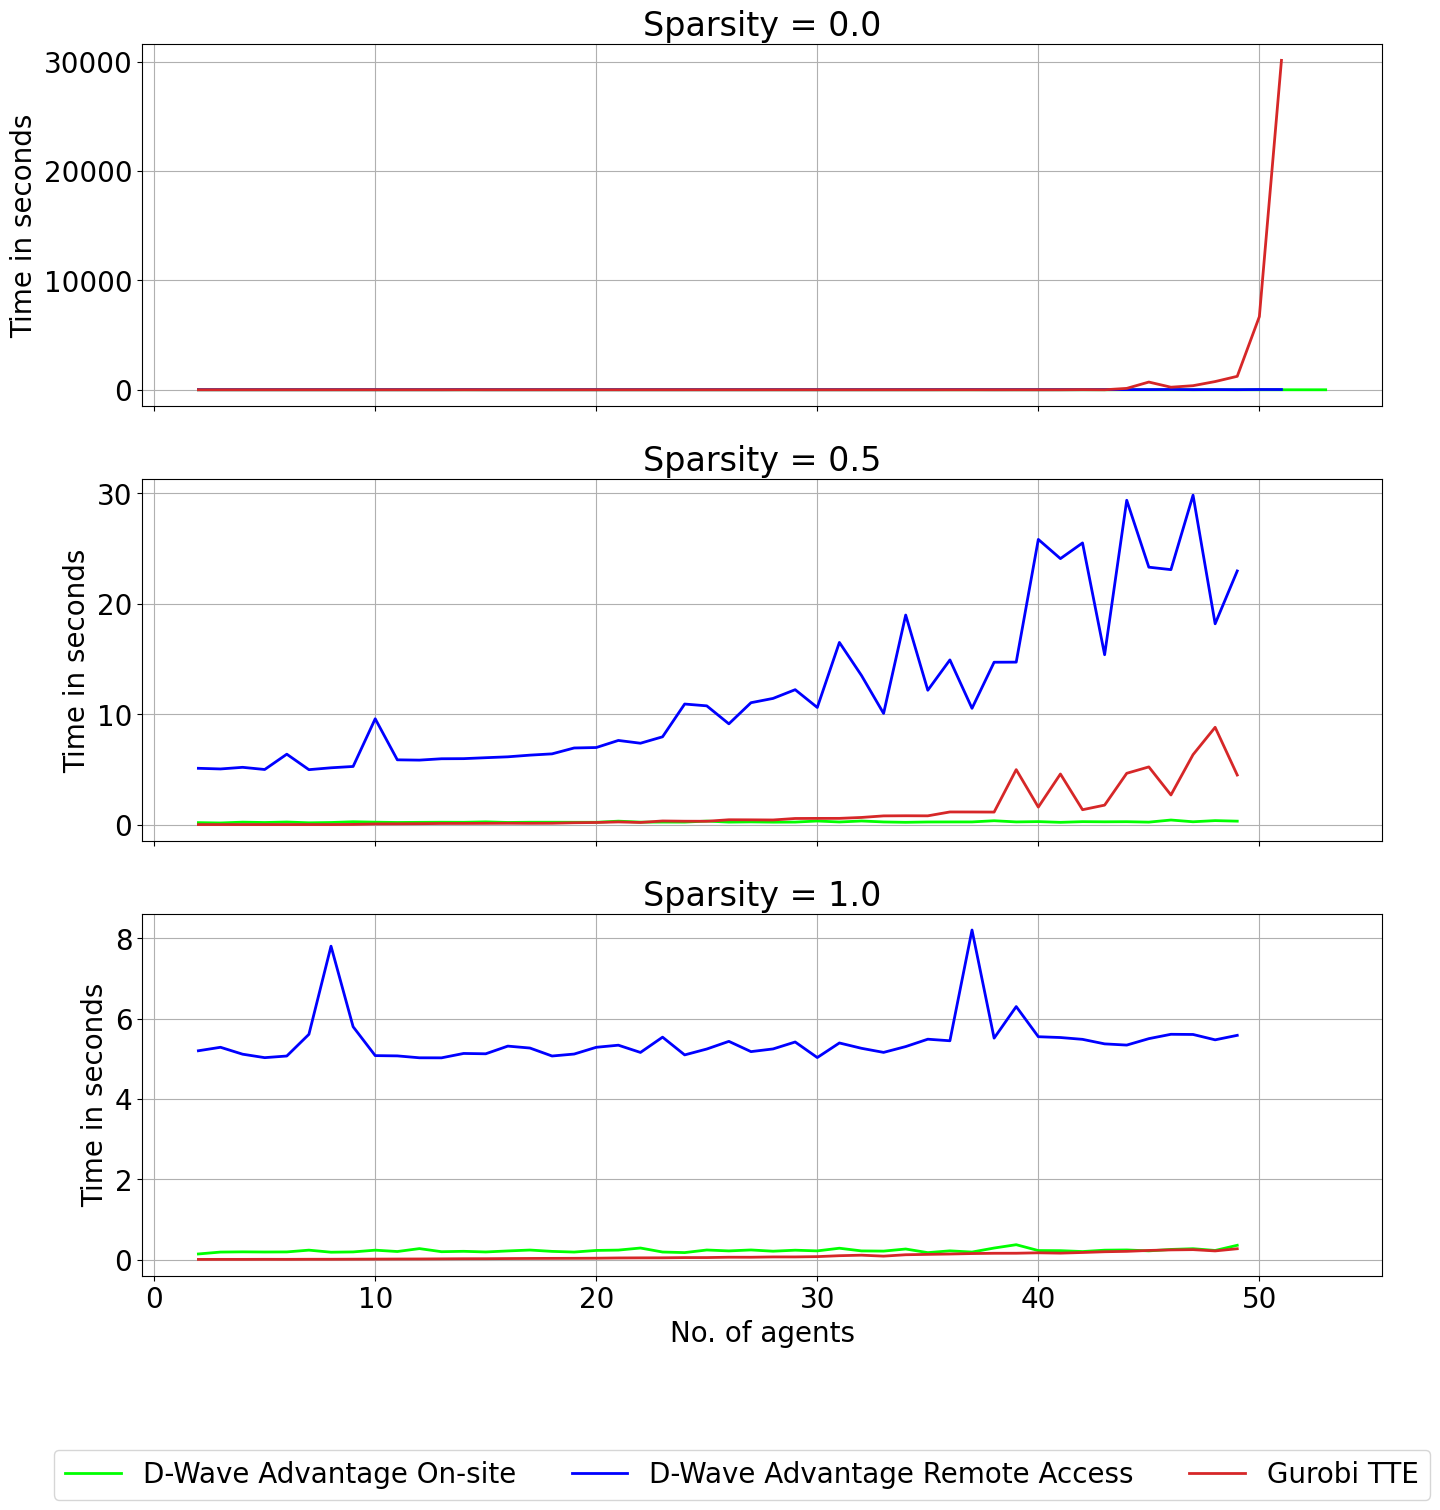

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

sparsities = [0.0, 0.5, 1.0]

# Load the CSV data
data = pd.read_csv('optimalSplit_report_11_111.csv')
data2 = pd.read_csv('optimalSplit_qputimes_11_111.csv')

# Set global font size
plt.rcParams.update({'font.size': 20})

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(16, 16), sharex=True)

for ax, sparsity in zip(axs, sparsities):
    filtered_data = data[(data['sparsity'] == sparsity) & (data['seed'] == 111)]
    filtered_data2 = data2[(data2['sparsity'] == sparsity) & (data2['seed'] == 111)]

    ax.plot(filtered_data2['n'], filtered_data2['qpu_access_time'] / 1000000, label='D-Wave Advantage On-site', color='lime',linewidth=2.0)
    ax.plot(filtered_data['n'], filtered_data['annealer_tte'], label='D-Wave Advantage Remote Access', color='blue', linewidth=2.0)
    ax.plot(filtered_data['n'], filtered_data['gurobi_tte'], label='Gurobi TTE', color='tab:red',linewidth=2.0)
    ax.set_title(f'Sparsity = {sparsity}')
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylabel('Time in seconds')

ax.set_xlabel('No. of agents')
# Set the y-axis label for the first subplot

# Create a single legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fontsize=20, ncol=3)

plt.show()

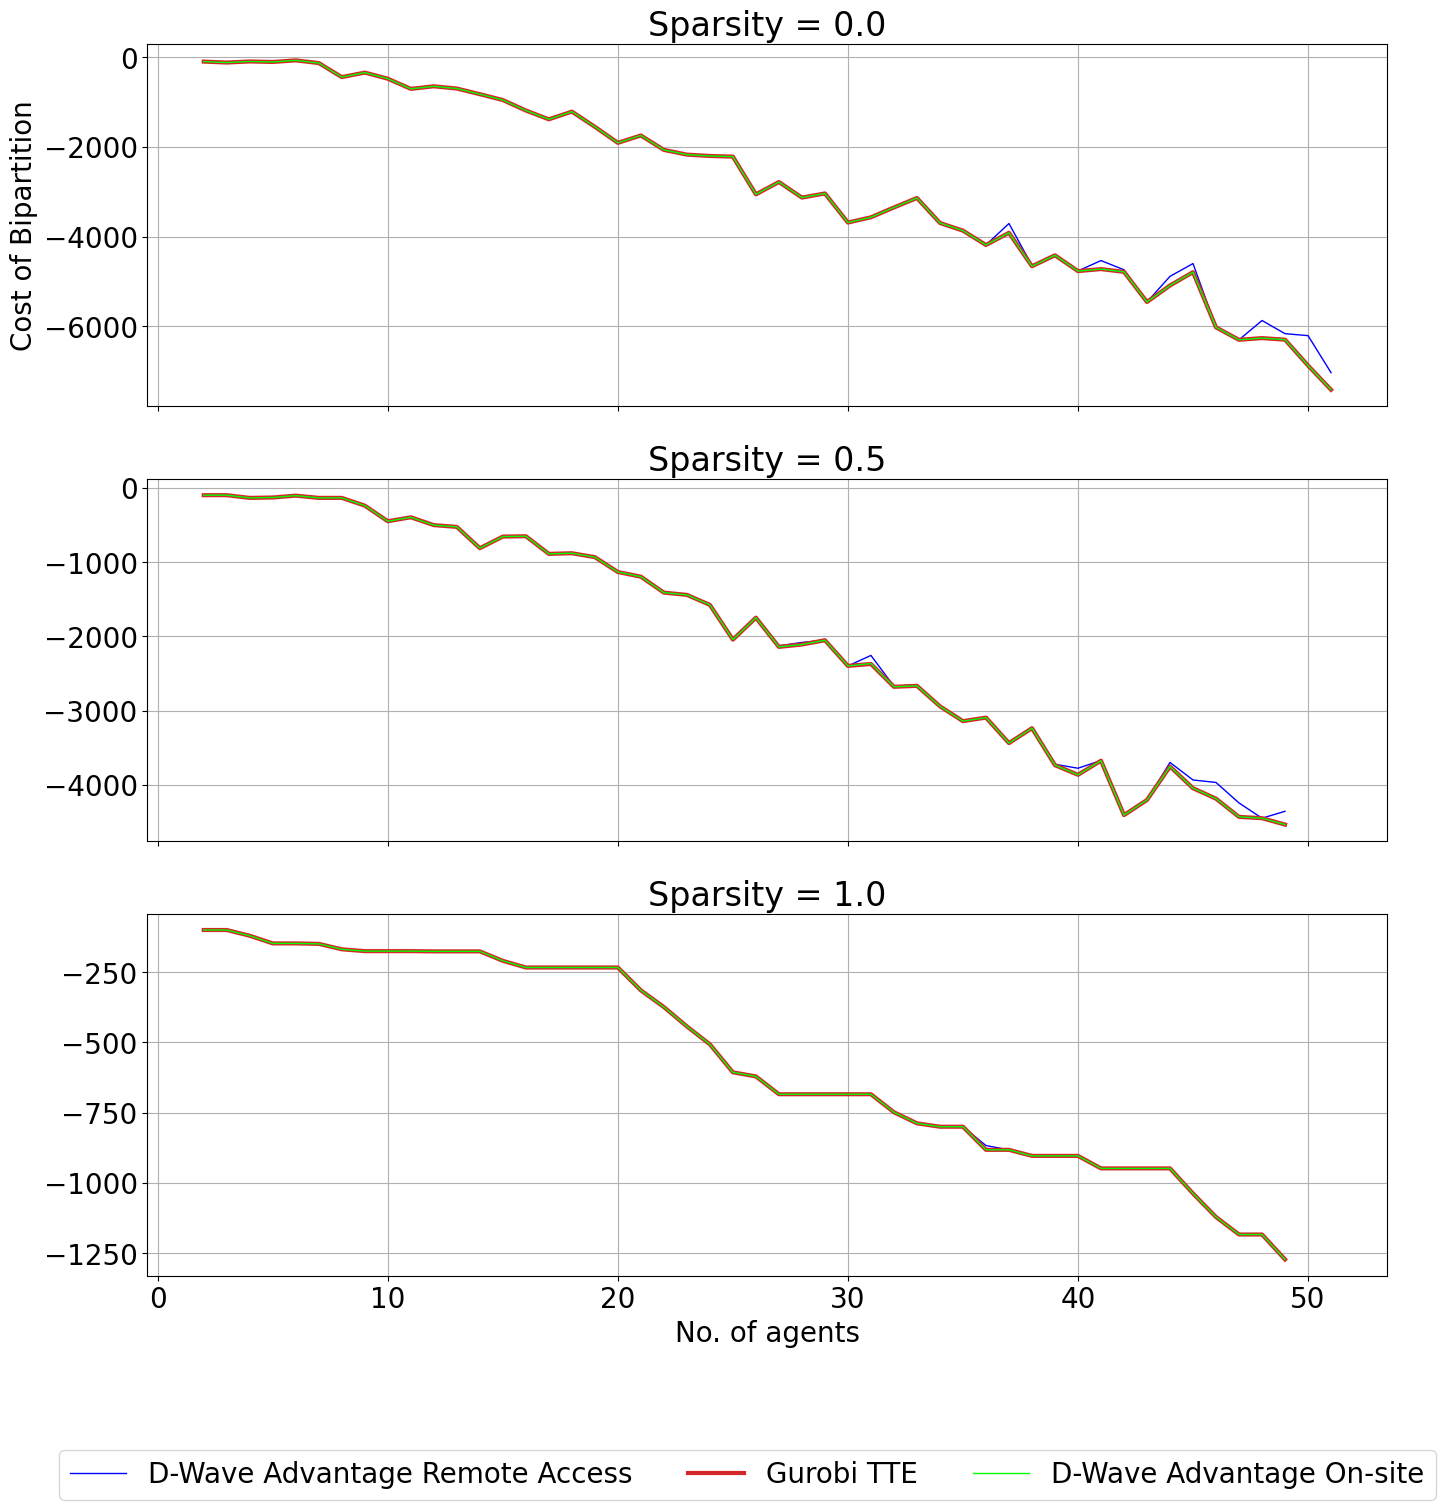

In [95]:
import pandas as pd
import matplotlib.pyplot as plt


sparsities = [0.0, 0.5, 1.0]

# Load the CSV data
data = pd.read_csv('optimalSplit_report_11_111.csv')

# Set global font size
plt.rcParams.update({'font.size': 20})

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(16,16), sharex=True)

for ax, sparsity in zip(axs, sparsities):
    filtered_data = data[(data['sparsity'] == sparsity) & (data['seed'] == 111)]

    ax.plot(filtered_data['n'], filtered_data['value_most'], label='D-Wave Advantage Remote Access', color='blue',linewidth=1.0)
    ax.plot(filtered_data['n'], filtered_data['value_gurobi'], label='Gurobi TTE', color='tab:red', linewidth=3.0)
    ax.plot(filtered_data['n'], filtered_data['value_first'], label='D-Wave Advantage On-site', color='lime',linewidth=1.0)
    ax.set_title(f'Sparsity = {sparsity}')
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_xlabel('No. of agents')
# Set the y-axis label for the first subplot
axs[0].set_ylabel('Cost of Bipartition')

# Create a single legend
# Create a single legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fontsize=20, ncol=3)


plt.show()


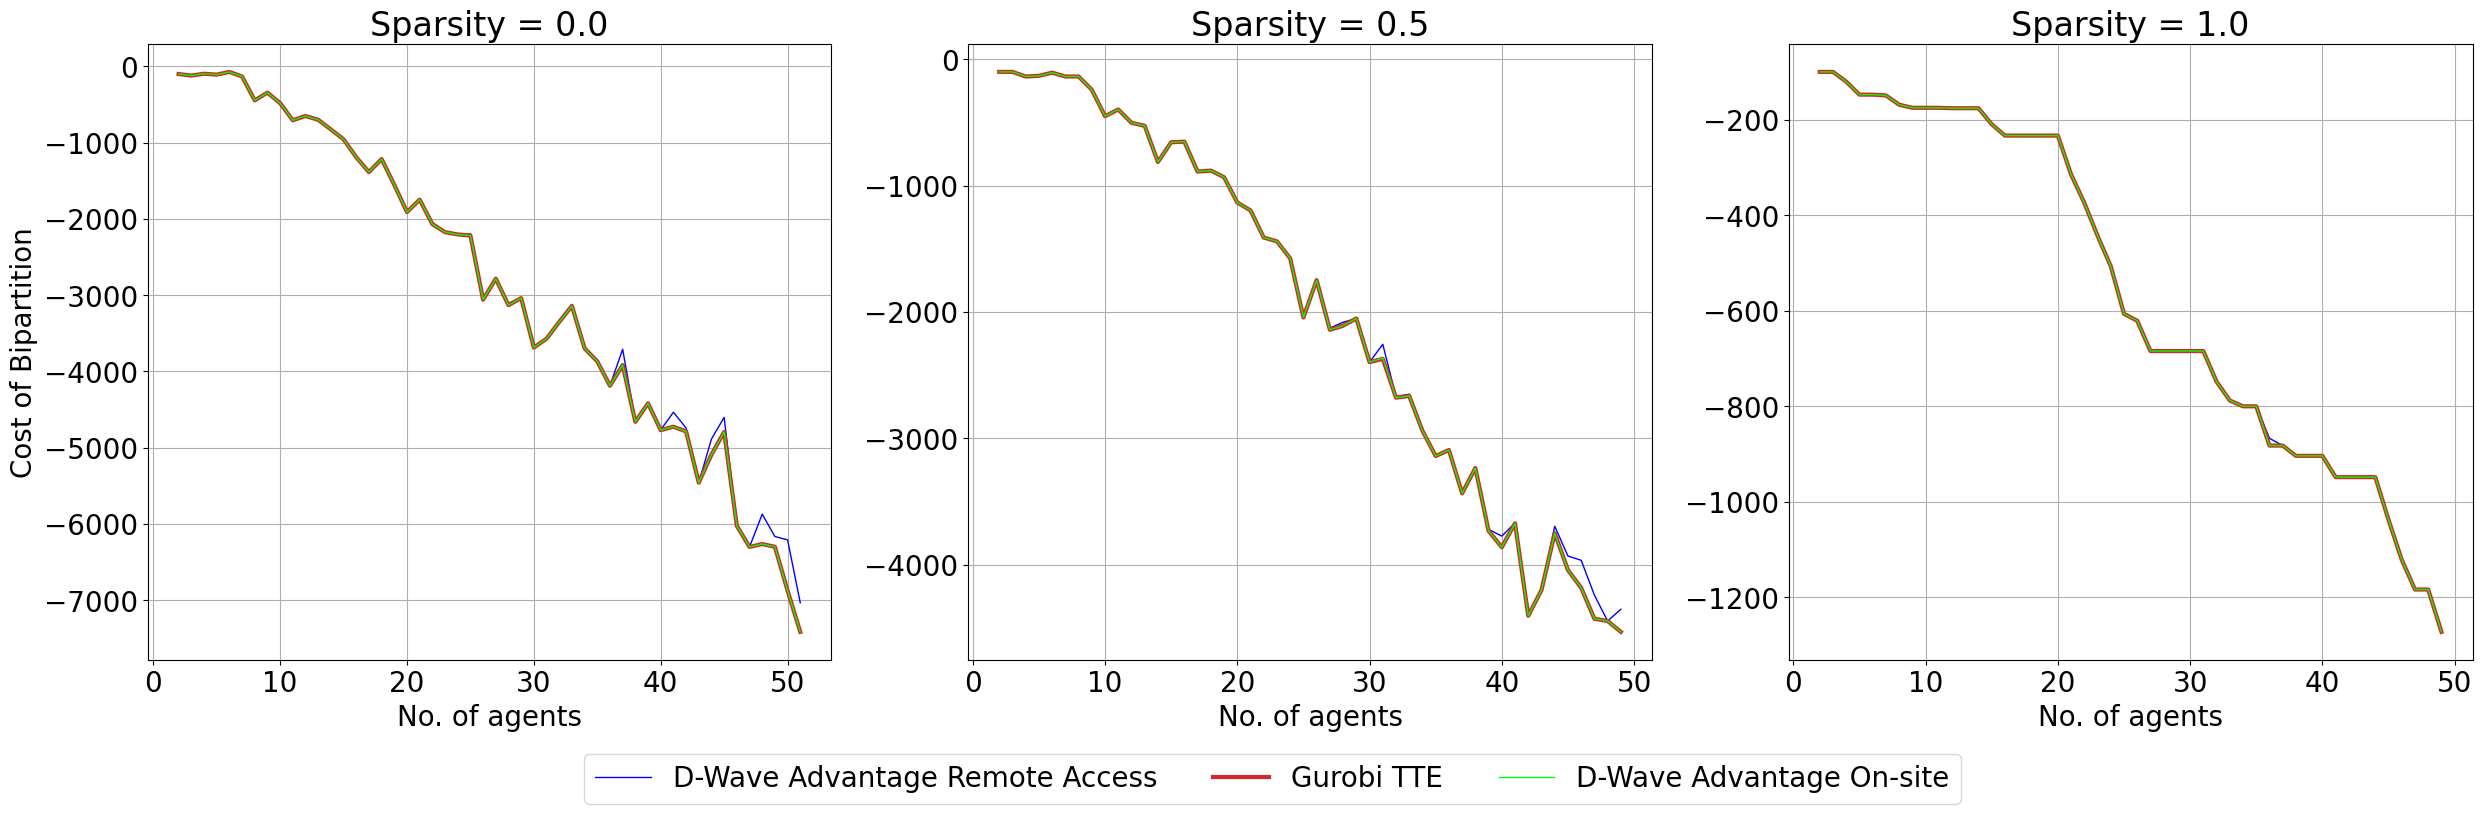

In [84]:
import pandas as pd
import matplotlib.pyplot as plt


sparsities = [0.0, 0.5, 1.0]

# Load the CSV data
data = pd.read_csv('optimalSplit_report_11_111.csv')

# Set global font size
plt.rcParams.update({'font.size': 20})

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 8))

for ax, sparsity in zip(axs, sparsities):
    filtered_data = data[(data['sparsity'] == sparsity) & (data['seed'] == 111)]

    ax.plot(filtered_data['n'], filtered_data['value_most'], label='D-Wave Advantage Remote Access', color='blue',linewidth=1.0)
    ax.plot(filtered_data['n'], filtered_data['value_first'], label='D-Wave Advantage On-site', color='lime',linewidth=1.0)
    ax.plot(filtered_data['n'], filtered_data['value_gurobi'], label='Gurobi TTE', color='tab:red', linewidth=3.0)
    ax.set_xlabel('No. of agents')
    ax.set_title(f'Sparsity = {sparsity}')
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=20)

# Set the y-axis label for the first subplot
axs[0].set_ylabel('Cost of Bipartition')

# Create a single legend
# Create a single legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fontsize=20, ncol=3)


plt.show()


In [11]:
import matplotlib.pyplot as plt
import numpy as np

G = 6.67430e-11  # gravitational constant, m^3 kg^-1 s^-1
M = 5.972e24  # mass of Earth, kg
R = 6371e3  # radius of Earth, meters

In [12]:
altitude = 400e3  # altitude above Earth's surface, meters
radius_orbit = R + altitude  # orbital radius
velocity = np.sqrt(G * M / radius_orbit)  # orbital velocity

In [13]:
dt = 10  # time step in seconds
total_time = 86400 * 7  # total simulation time (one week)
pos = np.array([radius_orbit, 0, 0])
vel = np.array([0, velocity, 0])
positions = []

In [ ]:
for t in range(0, total_time, dt):
    # Calculate forces, update position and velocity
    # Store the new position

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# Plotting code here
plt.show()

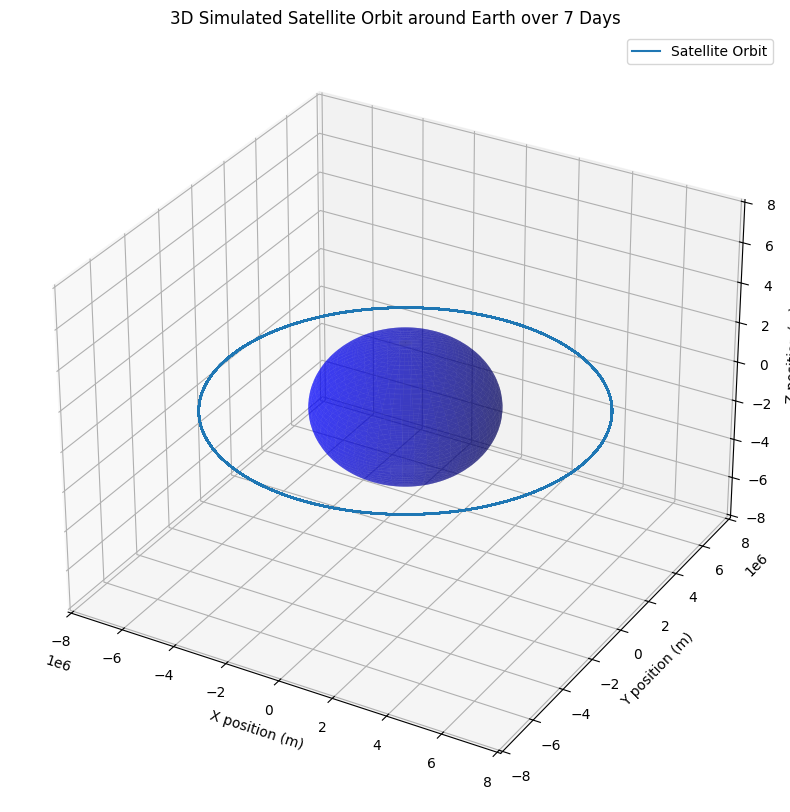

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Constants
G = 6.67430e-11  # gravitational constant, m^3 kg^-1 s^-1
M = 5.972e24  # mass of Earth, kg
R = 6371e3  # radius of Earth, meters
J2 = 1.08263e-3  # Earth's second zonal harmonic
Psr = 4.56e-6  # Solar radiation pressure at 1 AU, N/m^2

# Orbit parameters
altitude = 400e3  # altitude above Earth's surface, meters
radius_orbit = R + altitude  # orbital radius

# Calculate orbital velocity for a circular orbit
velocity = np.sqrt(G * M / radius_orbit)

# Time step and total simulation time
dt = 10  # seconds
total_time = 86400 * 7  # simulate for 7 days

# Initial position (x, y, z) and velocity (vx, vy, vz)
pos = np.array([radius_orbit, 0, 0])
vel = np.array([0, velocity, 0])

# Satellite mass and drag properties
sat_mass = 1000  # kg
Cd = 2.2  # drag coefficient
A = 2.0  # cross-sectional area, m^2 (increased for visible solar pressure effects)
rho = lambda h: 1e-13 * np.exp(-h / 100000)  # exponential model of atmospheric density

# Lists to store satellite positions
positions = []

# Solar vector calculation
def get_sun_vector(day):
    theta = 2 * np.pi * day / 365.25
    return np.array([np.cos(theta), np.sin(theta), 0])

# Leapfrog (Symplectic) Integrator setup
pos += 0.5 * vel * dt  # kickstart the integrator

# Simulation loop
for t in range(0, total_time, dt):
    r = np.linalg.norm(pos)
    h = r - R  # altitude above Earth's surface

    if h < 0:
        print(f"Warning: Satellite crashed into Earth at t = {t} seconds.")
        break

    # Gravitational acceleration with J2 perturbation
    x, y, z = pos
    factor = -G * M / r**3
    j2_factor = J2 * (R**2 / r**4) * 1.5
    acc_gravity = factor * (1 - j2_factor * (5 * z**2 / r**2 - 1)) * pos - j2_factor * factor * np.array([0, 0, 2 * z])

    # Atmospheric drag
    v_mag = np.linalg.norm(vel)
    drag = -0.5 * Cd * A * rho(h) * v_mag / sat_mass * vel

    # Solar radiation pressure
    sun_vector = get_sun_vector(t // 86400)  # update direction each day
    solar_acc = -Psr * A / sat_mass * sun_vector

    # Update velocity and position with gravity, drag, and solar pressure
    vel += (acc_gravity + drag + solar_acc) * dt
    pos += vel * dt

    # Store position
    positions.append(pos.copy())

# Convert positions to a numpy array for easy plotting
positions = np.array(positions)

# 3D plot of the orbit
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Draw the Earth as a 3D sphere with reduced size
visual_earth_radius = R * 0.5  # reduced for better visualization
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
x = visual_earth_radius * np.outer(np.cos(u), np.sin(v))
y = visual_earth_radius * np.outer(np.sin(u), np.sin(v))
z = visual_earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.5)

# Plot the orbit
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], label='Satellite Orbit')
ax.set_xlabel('X position (m)')
ax.set_ylabel('Y position (m)')
ax.set_zlabel('Z position (m)')
ax.set_title('3D Simulated Satellite Orbit around Earth over 7 Days')
ax.legend()

# Set equal aspect ratio and scaling
max_radius = radius_orbit * 1.2
ax.set_xlim([-max_radius, max_radius])
ax.set_ylim([-max_radius, max_radius])
ax.set_zlim([-max_radius, max_radius])

plt.show()

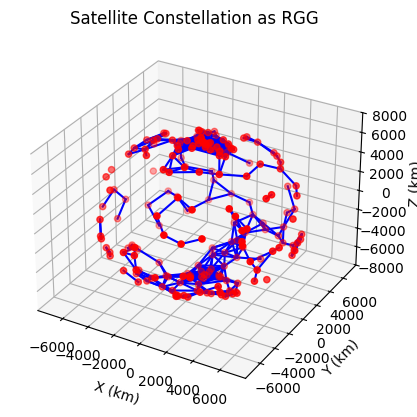

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Parameters
num_satellites = 200
communication_range = 2000  # km (example range, adjust as needed)
orbit_radius = 7000  # km (example low Earth orbit radius)

# Generate random positions for satellites in 3D space (spherical coordinates)
np.random.seed(42)  # For reproducibility
theta = np.random.uniform(0, 2 * np.pi, num_satellites)  # Angle in xy-plane
phi = np.random.uniform(0, np.pi, num_satellites)  # Angle from z-axis
x = orbit_radius * np.sin(phi) * np.cos(theta)
y = orbit_radius * np.sin(phi) * np.sin(theta)
z = orbit_radius * np.cos(phi)
positions = np.vstack((x, y, z)).T

# Create RGG
G = nx.random_geometric_graph(num_satellites, communication_range, pos={i: positions[i] for i in range(num_satellites)})

# Visualize
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for edge in G.edges:
    x_coords = [positions[edge[0]][0], positions[edge[1]][0]]
    y_coords = [positions[edge[0]][1], positions[edge[1]][1]]
    z_coords = [positions[edge[0]][2], positions[edge[1]][2]]
    ax.plot(x_coords, y_coords, z_coords, 'b-')

ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('Satellite Constellation as RGG')
plt.show()


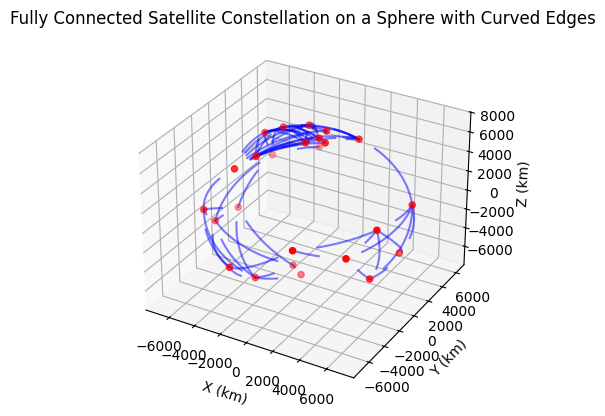

In [48]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as R

# Parameters
num_satellites = 25
communication_range = 7000  # km (example range, adjust as needed)
orbit_radius = 7000  # km (example low Earth orbit radius)

# Generate random positions for satellites on the surface of a sphere
np.random.seed(555)  # For reproducibility
theta = np.random.uniform(0, 2 * np.pi, num_satellites)  # Angle in xy-plane
phi = np.random.uniform(0, np.pi, num_satellites)  # Angle from z-axis
x = orbit_radius * np.sin(phi) * np.cos(theta)
y = orbit_radius * np.sin(phi) * np.sin(theta)
z = orbit_radius * np.cos(phi)
positions = np.vstack((x, y, z)).T

# Create a fully connected graph (complete graph)
# G = nx.complete_graph(num_satellites)
# # Create RGG
G = nx.random_geometric_graph(num_satellites, communication_range, pos={i: positions[i] for i in range(num_satellites)})



# Assign positions to the nodes
for i in range(num_satellites):
    G.nodes[i]['pos'] = positions[i]

# Assign real-number weights to the edges (e.g., Euclidean distance)
for (u, v) in G.edges():
    pos_u = positions[u]
    pos_v = positions[v]
    distance = np.linalg.norm(pos_u - pos_v)  # Euclidean distance
    G.edges[u, v]['weight'] = distance

# Function to draw a great circle arc
def draw_great_circle(ax, pos1, pos2, num_points=100):
    t = np.linspace(0, 1, num_points)
    # Ensure pos1 and pos2 are unit vectors
    pos1 = pos1 / np.linalg.norm(pos1)
    pos2 = pos2 / np.linalg.norm(pos2)
    # Calculate rotation axis and angle
    rot_axis = np.cross(pos1, pos2)
    rot_angle = np.arccos(np.dot(pos1, pos2))
    # Generate points along the great circle
    rot = R.from_rotvec(rot_axis * rot_angle / num_points)
    arc_points = np.zeros((num_points, 3))
    arc_points[0] = pos1
    for i in range(1, num_points):
        arc_points[i] = rot.apply(arc_points[i-1])
    arc_points *= orbit_radius
    ax.plot(arc_points[:, 0], arc_points[:, 1], arc_points[:, 2], 'b-', alpha=0.5)

# Visualize the graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot great circle arcs with weights as labels
for (u, v, d) in G.edges(data=True):
    pos_u = positions[u]
    pos_v = positions[v]
    draw_great_circle(ax, pos_u, pos_v)
    # mid_x = (pos_u[0] + pos_v[0]) / 2
    # mid_y = (pos_u[1] + pos_v[1]) / 2
    # mid_z = (pos_u[2] + pos_v[2]) / 2
    # ax.text(mid_x, mid_y, mid_z, f'{d["weight"]:.1f}', color='green', fontsize=8)

# Plot satellites
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('Fully Connected Satellite Constellation on a Sphere with Curved Edges')
plt.show()


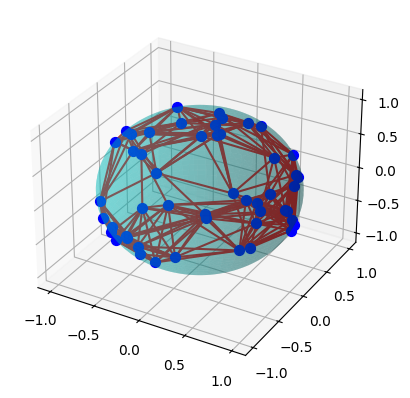

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

# Generate random points on the surface of a sphere
def generate_random_sphere_points(num_points):
    theta = np.random.rand(num_points) * 2 * np.pi
    phi = np.arccos(1 - 2 * np.random.rand(num_points))
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    return np.vstack((x, y, z)).T

# Calculate the great-circle distance between two points on a sphere
def great_circle_distance(point1, point2):
    return np.arccos(np.dot(point1, point2))

# Construct the random geometric graph
def construct_graph(points, radius):
    G = nx.Graph()
    for i, point1 in enumerate(points):
        G.add_node(i, pos=point1)
        for j, point2 in enumerate(points[i+1:], i+1):
            if great_circle_distance(point1, point2) < radius:
                G.add_edge(i, j)
    return G

# Plot the sphere, nodes, and edges
def plot_sphere_with_graph(points, graph):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the sphere
    u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)
    ax.plot_surface(x, y, z, color='c', alpha=0.3)
    
    # Plot the nodes
    for point in points:
        ax.scatter(point[0], point[1], point[2], color='b', s=50)
    
    # Plot the edges
    for edge in graph.edges():
        point1 = points[edge[0]]
        point2 = points[edge[1]]
        ax.plot([point1[0], point2[0]], [point1[1], point2[1]], [point1[2], point2[2]], color='r')
    
    plt.show()

# Main function
num_points = 50
radius = 1.0  # Adjust this radius to change the connectivity

points = generate_random_sphere_points(num_points)
graph = construct_graph(points, radius)
plot_sphere_with_graph(points, graph)


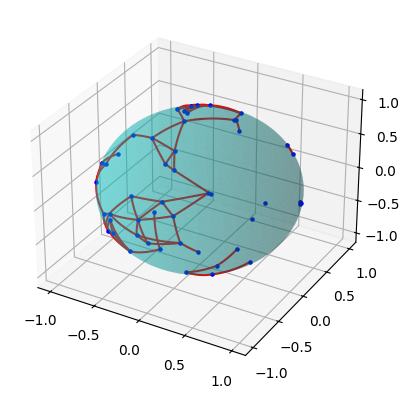

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

# Generate random points on the surface of a sphere
def generate_random_sphere_points(num_points):
    theta = np.random.rand(num_points) * 2 * np.pi
    phi = np.arccos(1 - 2 * np.random.rand(num_points))
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    return np.vstack((x, y, z)).T

# Calculate the great-circle distance between two points on a sphere
def great_circle_distance(point1, point2):
    return np.arccos(np.dot(point1, point2))

# Construct the random geometric graph
def construct_graph(points, radius):
    G = nx.Graph()
    for i, point1 in enumerate(points):
        G.add_node(i, pos=point1)
        for j, point2 in enumerate(points[i+1:], i+1):
            if great_circle_distance(point1, point2) < radius:
                G.add_edge(i, j)
    return G

# Generate great-circle arc points between two points on the sphere
def generate_great_circle_arc(point1, point2, num_points=100):
    t = np.linspace(0, 1, num_points)
    omega = great_circle_distance(point1, point2)
    sin_omega = np.sin(omega)
    arc_points = (np.sin((1 - t) * omega)[:, None] * point1[None, :] +
                  np.sin(t * omega)[:, None] * point2[None, :]) / sin_omega
    return arc_points

# Plot the sphere, nodes, and edges
def plot_sphere_with_graph(points, graph):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the sphere
    u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)
    ax.plot_surface(x, y, z, color='c', alpha=0.3)
    
    # Plot the nodes
    for point in points:
        ax.scatter(point[0], point[1], point[2], color='b', s=5)
    
    # Plot the edges
    for edge in graph.edges():
        point1 = points[edge[0]]
        point2 = points[edge[1]]
        arc_points = generate_great_circle_arc(point1, point2)
        ax.plot(arc_points[:, 0], arc_points[:, 1], arc_points[:, 2], color='r')
    
    plt.show()

# Main function
num_points = 50
radius = 0.5  # Adjust this radius to change the connectivity

points = generate_random_sphere_points(num_points)
graph = construct_graph(points, radius)
plot_sphere_with_graph(points, graph)


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from sgp4.api import Satrec, jday

# Fetch TLE data from CelesTrak
import requests

In [44]:
# def fetch_tle_data():
#     # url = "https://celestrak.org/NORAD/elements/gp.php?GROUP=active&FORMAT=tle"
#     url = "https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle"
#     # url = "https://celestrak.org/NORAD/elements/gp.php?GROUP=iridium&FORMAT=tle"
#     response = requests.get(url)
#     lines = response.text.splitlines()
#     tle_data = []
#     for i in range(0, len(lines), 3):
#         name = lines[i]
#         line1 = lines[i + 1]
#         line2 = lines[i + 2]
#         tle_data.append((name, line1, line2))
#     return tle_data


# tle_data = fetch_tle_data()
# tle_data

In [45]:
# import pickle

# def save_tle_data(tle_data, filename):
#     with open(filename, 'wb') as file:
#         pickle.dump(tle_data, file)

# # Example usage
# filename = 'tle_data.pkl'
# save_tle_data(tle_data, filename)

In [46]:
import pickle

def load_tle_data(filename):
    with open(filename, 'rb') as file:
        tle_data = pickle.load(file)
    return tle_data


filename = 'starlink_tle_data.pkl'
# Example usage
loaded_tle_data = load_tle_data(filename)
loaded_tle_data

[('STARLINK-1007           ',
  '1 44713U 19074A   24190.00001157  .01428838  00000+0  43459-1 0  9999',
  '2 44713  53.0546  42.7639 0001250  83.8785   7.2252 15.30811482257030'),
 ('STARLINK-1008           ',
  '1 44714U 19074B   24189.91053745  .00011000  00000+0  75620-3 0  9993',
  '2 44714  53.0548  44.0202 0001354  85.3445 274.7699 15.06400859257018'),
 ('STARLINK-1009           ',
  '1 44715U 19074C   24189.30234907 -.00002299  00000+0 -13552-3 0  9996',
  '2 44715  53.0550  46.7521 0001303  94.7560 265.3578 15.06390184256741'),
 ('STARLINK-1010           ',
  '1 44716U 19074D   24189.91790815  .00011615  00000+0  79730-3 0  9999',
  '2 44716  53.0541  43.9873 0001262  85.9271 274.1862 15.06404105256996'),
 ('STARLINK-1011           ',
  '1 44717U 19074E   24189.84971323  .00002758  00000+0  20398-3 0  9991',
  '2 44717  53.0547  64.2958 0001488 109.1392 250.9758 15.06402845256722'),
 ('STARLINK-1012           ',
  '1 44718U 19074F   24189.82207884  .00011724  00000+0  80432-3 

In [61]:
# Convert TLE data to satellite positions (latitude, longitude)
def tle_to_latlon(tle_data,n, timestamp):
    satellite_positions = []
    for name, line1, line2 in tle_data[:n]:  # Limit to first 10 satellites for example
        satellite = Satrec.twoline2rv(line1, line2)
        jd, fr = timestamp #jday(2024, 6, 25, 0, 0, 0)  # Example date
        e, r, v = satellite.sgp4(jd, fr)
        if e == 0:
            x, y, z = r
            lat = np.degrees(np.arcsin(z / np.linalg.norm(r)))
            lon = np.degrees(np.arctan2(y, x))
            satellite_positions.append((lat, lon))
            # print(f"Satellite {name}: lat {lat}, lon {lon}")  # Debugging print statement
        else:
            print(f"Error computing position for satellite {name}")
    return satellite_positions


def tle_to_latlon_v2(tle_data, n, timestamp):
    satellite_positions = []
    
    # Calculate step size for equidistant sampling
    step = len(tle_data) // n
    
    for i in range(0, len(tle_data), step):
        name, line1, line2 = tle_data[i]
        satellite = Satrec.twoline2rv(line1, line2)
        jd, fr = timestamp
        e, r, v = satellite.sgp4(jd, fr)
        if e == 0:
            x, y, z = r
            lat = np.degrees(np.arcsin(z / np.linalg.norm(r)))
            lon = np.degrees(np.arctan2(y, x))
            satellite_positions.append((lat, lon))
        else:
            print(f"Error computing position for satellite {name}")
    
    # If the length of tle_data is not an exact multiple of n,
    # make sure to get exactly n elements by adjusting the last few elements
    if len(satellite_positions) > n:
        satellite_positions = satellite_positions[:n]
    
    return satellite_positions

# Convert latitude and longitude to Cartesian coordinates
def latlon_to_cartesian(lat, lon):
    lat = np.radians(lat)
    lon = np.radians(lon)
    x = np.cos(lat) * np.cos(lon)
    y = np.cos(lat) * np.sin(lon)
    z = np.sin(lat)
    return np.array([x, y, z])

# Calculate the great-circle distance between two points on a sphere
def great_circle_distance(point1, point2):
    return np.arccos(np.clip(np.dot(point1, point2), -1.0, 1.0))

# Construct the random geometric graph
def construct_graph(points, radius):
    G = nx.Graph()
    for i, point1 in enumerate(points):
        G.add_node(i, pos=point1)
        for j, point2 in enumerate(points[i+1:], i+1):
            dist = great_circle_distance(point1, point2)
            if dist < radius:
                # G.add_edge(i, j)
                G.add_weighted_edges_from([(i, j, dist)])
    return G

# Generate great-circle arc points between two points on the sphere
def generate_great_circle_arc(point1, point2, num_points=100):
    t = np.linspace(0, 1, num_points)
    omega = great_circle_distance(point1, point2)
    sin_omega = np.sin(omega)
    arc_points = (np.sin((1 - t) * omega)[:, None] * point1[None, :] +
                  np.sin(t * omega)[:, None] * point2[None, :]) / sin_omega
    return arc_points

def plot_sphere_with_graph(points, graph):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the sphere
    u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)
    ax.plot_surface(x, y, z, color='c', alpha=0.2, zorder=0)  # Lower alpha value for the sphere
    
    # Overlay the nodes
    for point in points:
        ax.scatter(point[0], point[1], point[2], color='blue', s=50, zorder=1)  # Higher zorder to overlay on top
    
    # Overlay the edges
    for edge in graph.edges():
        point1 = points[edge[0]]
        point2 = points[edge[1]]
        arc_points = generate_great_circle_arc(point1, point2)
        ax.plot(arc_points[:, 0], arc_points[:, 1], arc_points[:, 2], color='grey', zorder=2)  # Higher zorder to overlay on top
    
    # Remove the axes grid and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()
    save_file_path = os.path.join("plots", f"sat_globe_1.jpg")
    plt.savefig(save_file_path, dpi=600, bbox_inches='tight')
    
    plt.show()

# Main function
# tle_data = fetch_tle_data()

Error computing position for satellite STARLINK-1007           
Error computing position for satellite STARLINK-32021          
49


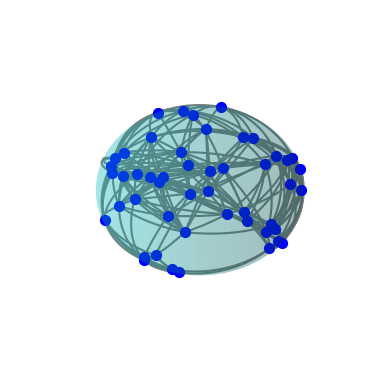

In [62]:
filename = 'starlink_tle_data.pkl'
tle_data = load_tle_data(filename)

n = 50
timestamp = jday(2024, 5, 30, 0, 0, 0)
satellite_positions = tle_to_latlon_v2(tle_data, n, timestamp)
print(len(satellite_positions))

# Check if we got valid positions
if not satellite_positions:
    print("No satellite positions found. Check TLE data and sgp4 library setup.")
else:
    points = np.array([latlon_to_cartesian(lat, lon) for lat, lon in satellite_positions])

    # Construct the graph
    radius = 1.0  # Adjust this radius to change the connectivity
    graph = construct_graph(points, radius)

    # Plot the graph on the sphere
    plot_sphere_with_graph(points, graph)

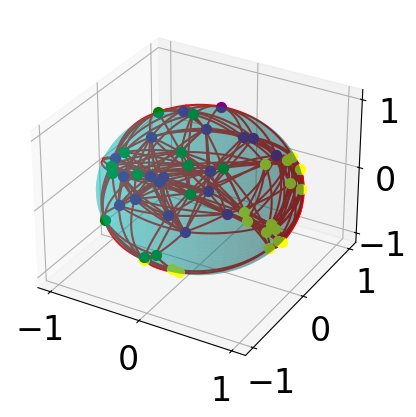

In [96]:
from sklearn.cluster import KMeans

# Cluster the points into three groups
def cluster_points(points, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(points)
    labels = kmeans.labels_
    return labels

# Plot the sphere with nodes in three different colors
def plot_sphere_with_clusters(points, graph, labels):
    colors = ['purple', 'green', 'yellow']
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the sphere
    u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)
    ax.plot_surface(x, y, z, color='c', alpha=0.3)
    
    # Plot the nodes with different colors for each cluster
    for i, point in enumerate(points):
        color = colors[labels[i]]
        ax.scatter(point[0], point[1], point[2], color=color, s=50)
    
    # Plot the edges
    for edge in graph.edges():
        point1 = points[edge[0]]
        point2 = points[edge[1]]
        arc_points = generate_great_circle_arc(point1, point2)
        ax.plot(arc_points[:, 0], arc_points[:, 1], arc_points[:, 2], color='r')

        
    
    plt.show()

# Cluster the points
labels = cluster_points(points)

# Plot the graph with vertices in three different colors
plot_sphere_with_clusters(points, graph, labels)


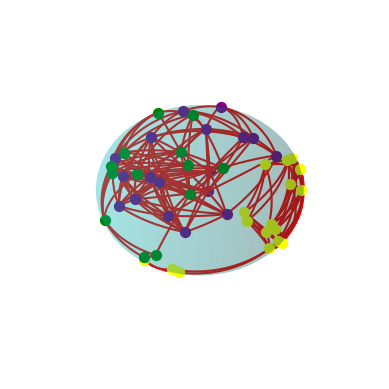

In [98]:
# Plot the sphere with nodes in three different colors
def plot_sphere_with_clusters(points, graph, labels):
    colors = ['purple', 'green', 'yellow']
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the sphere
    u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)
    ax.plot_surface(x, y, z, color='c', alpha=0.2)
    
    # Plot the nodes with different colors for each cluster
    for i, point in enumerate(points):
        color = colors[labels[i]]
        ax.scatter(point[0], point[1], point[2], color=color, s=50, zorder=5)
    
    # Plot the edges only if connecting nodes have the same label
    for edge in graph.edges():
        if labels[edge[0]] == labels[edge[1]]:
            point1 = points[edge[0]]
            point2 = points[edge[1]]
            arc_points = generate_great_circle_arc(point1, point2)
            ax.plot(arc_points[:, 0], arc_points[:, 1], arc_points[:, 2], color='red', zorder=5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()
    save_file_path = os.path.join("plots", f"sat_globe_3.jpg")
    plt.savefig(save_file_path, dpi=600, bbox_inches='tight')
    plt.show()

plot_sphere_with_clusters(points, graph, labels)

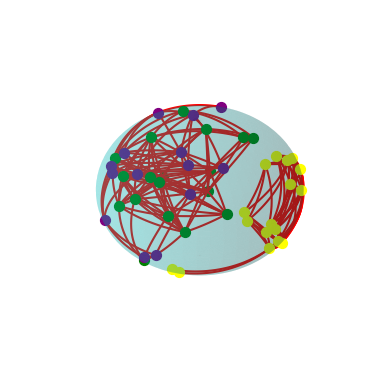

In [79]:
# Plot the sphere with nodes in three different colors
def plot_sphere_with_clusters(points, graph, labels):
    colors = ['purple', 'green', 'yellow']
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the sphere
    u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)
    ax.plot_surface(x, y, z, color='c', alpha=0.2)
    
    # Plot the nodes with different colors for each cluster
    for i, point in enumerate(points):
        color = colors[labels[i]]
        ax.scatter(point[0], point[1], point[2], color=color, s=50, zorder=5)
    
    # Plot the edges only if connecting nodes have the same label
    for edge in graph.edges():
        if labels[edge[0]] == labels[edge[1]]:
            point1 = points[edge[0]]
            point2 = points[edge[1]]
            arc_points = generate_great_circle_arc(point1, point2)
            ax.plot(arc_points[:, 0], arc_points[:, 1], arc_points[:, 2], color='red', zorder=5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()
    plt.show()

plot_sphere_with_clusters(points, graph, labels)

In [93]:
def get_graph_positions(timestamp, n, radius):
    tle_data = fetch_tle_data()
    satellite_positions = tle_to_latlon(tle_data, n, timestamp)
    points = np.array([latlon_to_cartesian(lat, lon) for lat, lon in satellite_positions])
    graph = construct_graph(points, radius)
    return graph, points

timestamp = jday(2024, 7, 1, 0, 0, 0)
n = 10
radius = 0.7

G, pos = get_graph_positions(timestamp, n, radius)

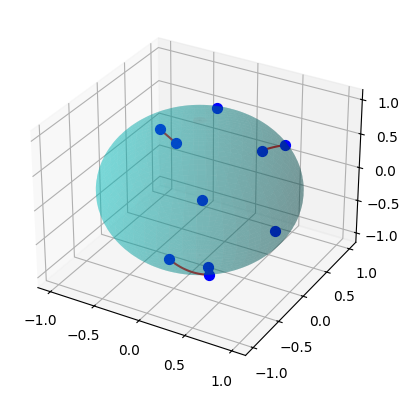

In [94]:
plot_sphere_with_graph(pos, G)

In [95]:
len(G.edges())

4

In [96]:
connected_components = list(nx.connected_components(G))
connected_components

[{0, 2, 4}, {1, 6}, {3}, {5}, {7, 8}, {9}]

In [97]:
# Step 2: Create subgraphs for each connected component
subgraphs = [G.subgraph(component).copy() for component in connected_components]

# subgraphs now contains the list of disconnected subgraphs
for i, subgraph in enumerate(subgraphs):
    print(f"Subgraph {i+1}:")
    print(subgraph.edges(data=True))

Subgraph 1:
[(0, 4, {'weight': 0.6155314001392781}), (2, 4, {'weight': 0.5024747046591593})]
Subgraph 2:
[(1, 6, {'weight': 0.5006791184580079})]
Subgraph 3:
[]
Subgraph 4:
[]
Subgraph 5:
[(8, 7, {'weight': 0.3009703049936902})]
Subgraph 6:
[]


In [110]:
n_max = 5

radius = 0.8
timestamp = jday(2024, 7, 1, 0, 0, 0)

n_max = 2

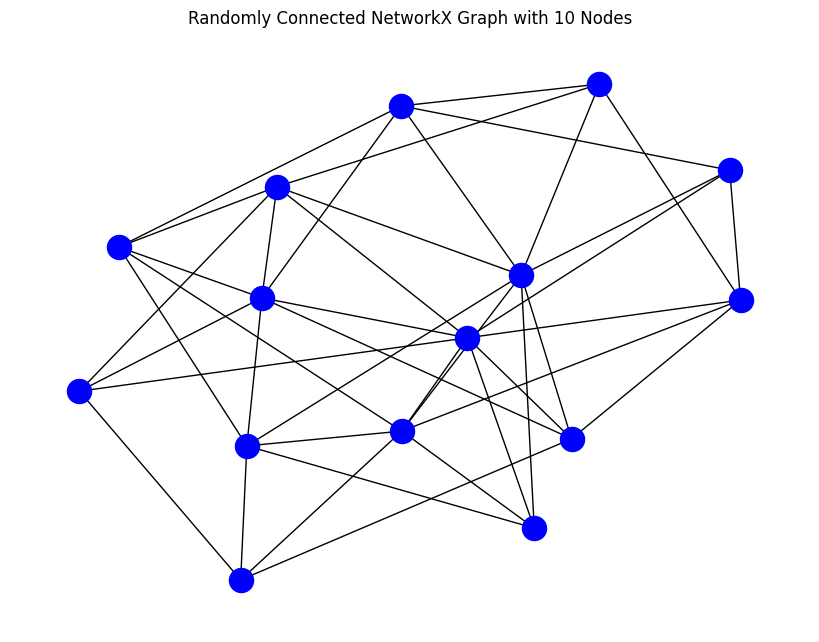

: 

In [86]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph with 10 nodes
G = nx.gnp_random_graph(15, 0.3)

# Draw the graph with blue nodes and black edges
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=False, node_color='blue', edge_color='black', node_size=300, font_weight='bold', font_color='white')
plt.title('Randomly Connected NetworkX Graph with 10 Nodes')
plt.show()


In [112]:
connected_components = list(nx.connected_components(G))
connected_components

[{0, 2, 4}, {1, 6}, {3}, {5, 7, 8}, {9}]

In [113]:
induced_subgraph_games = []
for component in connected_components:
    if len(component) > n_max:
        isg = {}
        # G.subgraph(component).edges(data=True)
        for node1,node2,weight in G.subgraph(component).edges(data=True):
            isg[node1,node2] = weight['weight']
        induced_subgraph_games.append(isg)
    else:
        optimal_coalition_structure.append(component)

In [114]:
induced_subgraph_games

[{(0, 4): 0.6155314001392781, (2, 4): 0.5024747046591593},
 {(8, 7): 0.3009703049936902, (5, 7): 0.7155708214210453}]

In [115]:
optimal_coalition_structure

[{1, 6}, {3}, {9}]

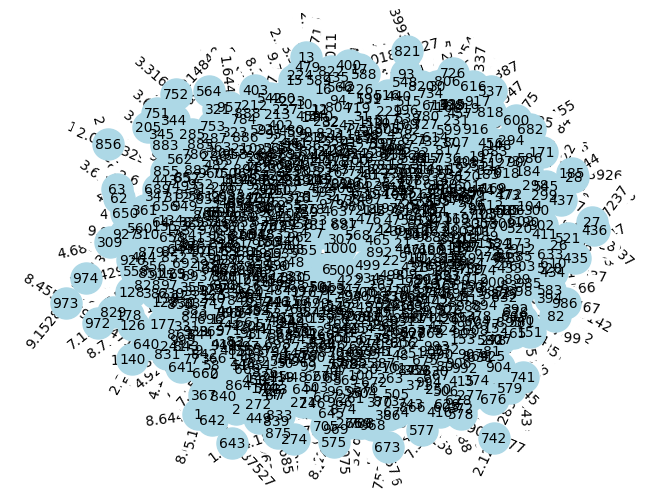

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def create_ngon_plus_one_graph_with_weights(n):
    # Create an empty graph
    G = nx.Graph()

    # Add nodes in the shape of an n-gon
    for i in range(n):
        G.add_node(i)

    # Add edges to form the n-gon with random weights
    for i in range(n):
        weight = random.uniform(1, 10)  # Random weight between 1 and 10
        G.add_edge(i, (i + 1) % n, weight=weight)

    # Add the additional node (n) that connects to every other n nodes with random weights
    G.add_node(n)
    for i in range(n):
        weight = random.uniform(1, 10)  # Random weight between 1 and 10
        G.add_edge(n, i, weight=weight)

    return G

# Example usage
n = 5  # Number of sides in the n-gon
G = create_ngon_plus_one_graph_with_weights(n)

# Draw the graph with edge weights
pos = nx.spring_layout(G)  # Layout for better visualization
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [51]:
from qiskit_optimization.applications import Maxcut
import dimod
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

In [52]:
import time

In [53]:
nx.adjacency_matrix(G).todense()

array([[0.        , 8.67228608, 0.        , ..., 0.        , 2.47534313,
        3.45389247],
       [8.67228608, 0.        , 8.6447728 , ..., 0.        , 0.        ,
        1.41689889],
       [0.        , 8.6447728 , 0.        , ..., 0.        , 0.        ,
        2.29515364],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 8.27893771,
        6.04176945],
       [2.47534313, 0.        , 0.        , ..., 8.27893771, 0.        ,
        2.37823089],
       [3.45389247, 1.41689889, 2.29515364, ..., 6.04176945, 2.37823089,
        0.        ]])

In [54]:
start_time = time.time()
w = -1 * nx.adjacency_matrix(G).todense()
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()
linear = qp.objective.linear.coefficients.toarray(order=None, out=None)
quadratic = qp.objective.quadratic.coefficients.toarray(order=None, out=None)
linear = {int(idx):-round(value,2) for idx,value in enumerate(linear[0])}
quadratic = {(int(iy),int(ix)):-quadratic[iy, ix] for iy, ix in np.ndindex(quadratic.shape) if iy<ix and abs(quadratic[iy, ix])!=0}
problem_formulation_time = time.time() - start_time

In [55]:
vartype = dimod.BINARY
bqm = dimod.BinaryQuadraticModel(linear, quadratic, 0.0, vartype)
start_time = time.time()
dwave_sampler = DWaveSampler(token = 'jul-5215c8008132f206eba40344f90b0cfe8a586600', solver={'topology__type': 'pegasus'})
connection_time = time.time() - start_time
start_time = time.time()
sampler = EmbeddingComposite(dwave_sampler)
embedding_time = time.time() - start_time
start_time = time.time()
sample_set = sampler.sample(bqm, num_reads=2000, chain_strength=0.1)
response_time = time.time() - start_time

In [56]:
info_dict = sample_set.info['timing'].copy()
start_time = time.time()
samples_df = sample_set.to_pandas_dataframe()
sample_fetch_time = time.time() - start_time
info_dict['problem_formulation_time'] = problem_formulation_time
info_dict['connection_time'] = connection_time
info_dict['embedding_time'] = embedding_time
info_dict['response_time'] = response_time
info_dict['sample_fetch_time'] = sample_fetch_time

In [57]:
info_dict

{'qpu_sampling_time': 396880.0,
 'qpu_anneal_time_per_sample': 20.0,
 'qpu_readout_time_per_sample': 157.86,
 'qpu_access_time': 412809.16,
 'qpu_access_overhead_time': 3752.84,
 'qpu_programming_time': 15929.16,
 'qpu_delay_time_per_sample': 20.58,
 'post_processing_overhead_time': 8.0,
 'total_post_processing_time': 8.0,
 'problem_formulation_time': 0.4054524898529053,
 'connection_time': 2.085448741912842,
 'embedding_time': 0.04298567771911621,
 'response_time': 229.83180570602417,
 'sample_fetch_time': 0.0010573863983154297}

In [58]:
samples_df

0  1  2  3  4  5  6  7  8  9  ...  994  995  996  997  998  999  1000  \
0    1  1  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1     1   
1    0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0     0   
2    1  1  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1     1   
3    1  1  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1     1   
4    1  1  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1     1   
..  .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...   ...   
332  1  1  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1     1   
333  1  1  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1     1   
334  1  1  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1     1   
335  1  1  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1     1   
336  1  1  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1     1   

     chain_break_fraction       energy  num_occurrences  
0                0.000000    -0.081230              917  
1                0.000000     0.000000                1  
2                0.000999    -0.081230              281  
3                0.000999    -0.081230               53  
4                0.000999    -0.081230               35  
..                    ...          ...              ...  
332              0.010989  2049.834988                1  
333              0.006993  1287.979559                1  
334              0.009990  1220.072277                1  
335              0.009990  1271.021075                1  
336              0.008991  1651.933148                1  

[337 rows x 1004 columns]

In [60]:
''.join(samples_df.iloc[0][:-3].astype(int).astype(str))

'111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

In [64]:
''.join(samples_df.sort_values(by=['num_occurrences', 'energy'], ascending=[False, True]).iloc[0][:-3].astype(int).astype(str)) == ''.join(samples_df.iloc[0][:-3].astype(int).astype(str))

True